**Project Title : Predicting whether a customer will default on his/her credit card**
**This project is aimed to be predicting the case of customers who will be defaulter of their credit card bill payments from their privious data and to pdredict such custumer who will be defaulter that no credit card to be allow to them** 

ID: id of each custumer.

LIMIT_BAL: Amount of given in credit card

assumptions made for analyze
SEX: Gender (1 = male, 2 = female)

EDUCATION:0=no school, 1=high school,2=primarycollege, 3=graduation, 4=master, 5=phd , 6=others

MARRIAGE: Marital status 0= no marraige, 1=marraied, 2=living relation, 3=others
AGE: Age in years

Scale for PAY_0 to PAY_6 : - indicates not paid 0 and positive indicates are paid

BILL_AMT1-BILL_AMT6= Amount to be paid

PAY_AMT1-PAY_AMT6= Amount paid in each month

dependant variable column
default.payment.next.month: Default payment (1=yes, 0=no)

**As we have to predict yes or no this is the problem statement of Supervised learning-binary classification**

In [56]:
# Import all necessary libaries 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset of csv file

In [57]:
# Load the csv file data of credit card dataset 
credit=pd.read_excel(r'H:\IT FOLDER\MACHINELEARINING\project\default of credit card clients.xlsx')


In [58]:
# read the dataset
credit.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [59]:
# shape of dataset
credit.shape

(30001, 25)

## Number of record=30001
## Number of features=25

In [60]:
# check name of columns
credit.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

## as two columns are in dataset so delete not necessary column name 

In [61]:
# remname the columns as required
credit.columns=['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month']

In [62]:
# check dataset
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [63]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30001 non-null  object
 1   LIMIT_BAL                   30001 non-null  object
 2   SEX                         30001 non-null  object
 3   EDUCATION                   30001 non-null  object
 4   MARRIAGE                    30001 non-null  object
 5   AGE                         30001 non-null  object
 6   PAY_0                       30001 non-null  object
 7   PAY_2                       30001 non-null  object
 8   PAY_3                       30001 non-null  object
 9   PAY_4                       30001 non-null  object
 10  PAY_5                       30001 non-null  object
 11  PAY_6                       30001 non-null  object
 12  BILL_AMT1                   30001 non-null  object
 13  BILL_AMT2                   30001 non-null  ob

In [64]:
# delete the extra column row as index 0 row wise
credit.drop(0,inplace=True)

In [65]:
# check final output
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [66]:
# no need of id column as it has no need in prediction so drop the column
credit.drop('ID',axis=1,inplace=True)

In [67]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

* **here we can clear see we dont have categorical data but all columns are in datatype of object.**
* **so we have to convert the data type into respective numerical type.**
* **we have all columns are null free data as having non null dataset.**

In [68]:
# convert datatypes into integers(numerical)
credit=credit.astype('int64')

In [69]:
# check the datatype of columns as we changed it to integer
credit.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [70]:
# Let's see the descriptive stats of all the features

credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


* **we have dichotomous column like sex and dependant variable default payment next month**
* **we have low range column like sex,education,marraige,age and pay_0 to pay_06**
* **we have high range column like limit_bal and BILL_AMT and PAY_AMT ALL**
* **limit_bal is min 10000 and max 1000000**
* **sex having min male and maximum female user**
* **marraige min unmarried and max are in other users**
* **education having min no school and maximum others**
* **age min 21 and max 79**
* **pay_0 column shows min defaulter -2 and max no defaulter 8**

## 3 Exploratory Analysis

# Dependant Variable - default payment next month

In [71]:
print('The categories of default payment next month range are: ',credit['default payment next month'].unique().tolist())

The categories of default payment next month range are:  [1, 0]


* **non defaulter =0**
* **defaulter=1**

In [72]:
# Let's see the count of each of these categories

credit['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

* **as we can clearly see data is imbalanced 0 having 78% and 1 having 22% values**

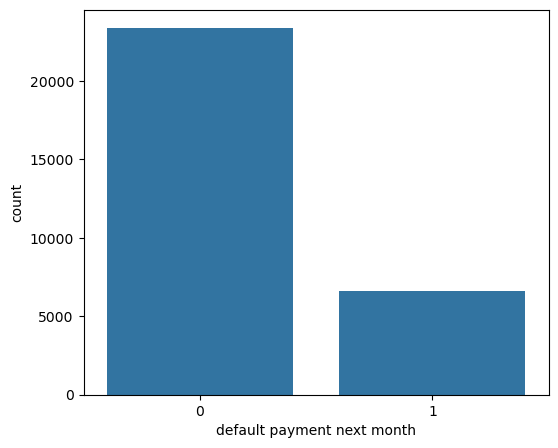

In [73]:
plt.figure(figsize=(6,5))
sns.countplot(x ='default payment next month', data = credit)
plt.show()

* **with the chart can clearly know the imbalanced data**

## check relation of sex , education , marraige and age with dependant variable

In [74]:
# For sex column
# 1=male and 2 for female
count_sex=credit['SEX'].value_counts().sort_index()

<Axes: xlabel='SEX', ylabel='count'>

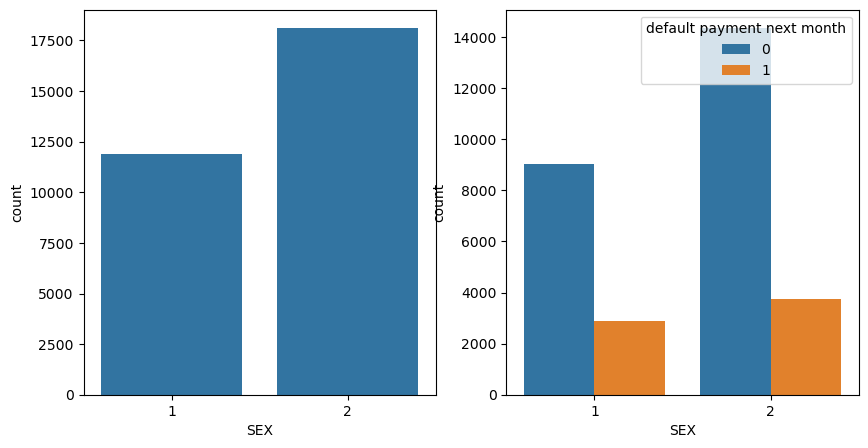

In [75]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = credit)
sns.countplot(x = 'SEX', hue = 'default payment next month',ax = axes[1], data = credit)

**females are using more cards than males and having defaulter slightly high than males**

In [76]:
# education column
#0=no school, 1=high school,2=primarycollege, 3=graduation, 4=master, 5=phd , 6=others
credit['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

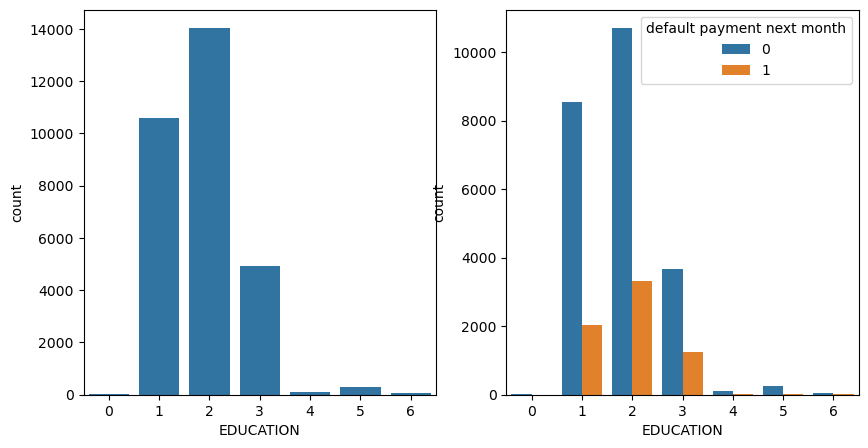

In [77]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = credit)
sns.countplot(x = 'EDUCATION', hue = 'default payment next month',ax = axes[1], data = credit)

**as see no school people using almost no cards compare to others**
**primary college people using highest card among all and then high school**
**as masters and phd , other using less card means highest qualification having low nos using cards**
**primary college and high school are having more defaulters**

In [78]:
# marraige column
# 0= no marraige, 1=marraied, 2=living relation, 3=others
credit['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

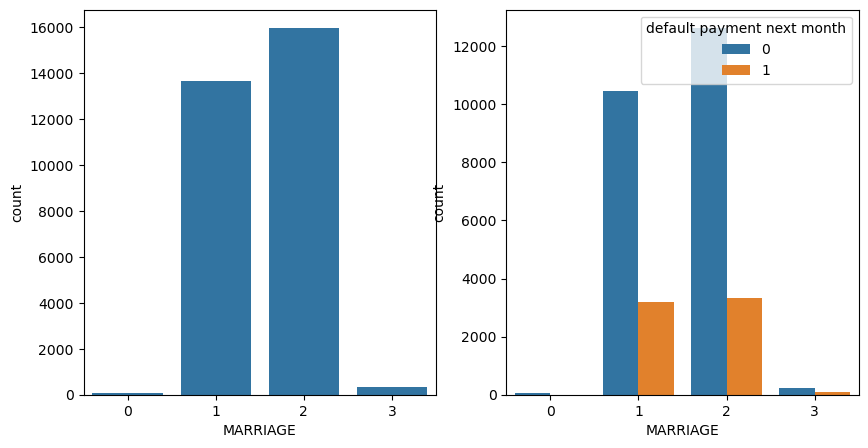

In [79]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = credit)
sns.countplot(x = 'MARRIAGE', hue = 'default payment next month',ax = axes[1], data = credit)

**as we can see unmarried people are using too low credit cards compare to married and in relationship people**
**as compare to married people relationship people using more cards and having slightly high no of defaulter**

<Axes: xlabel='AGE', ylabel='count'>

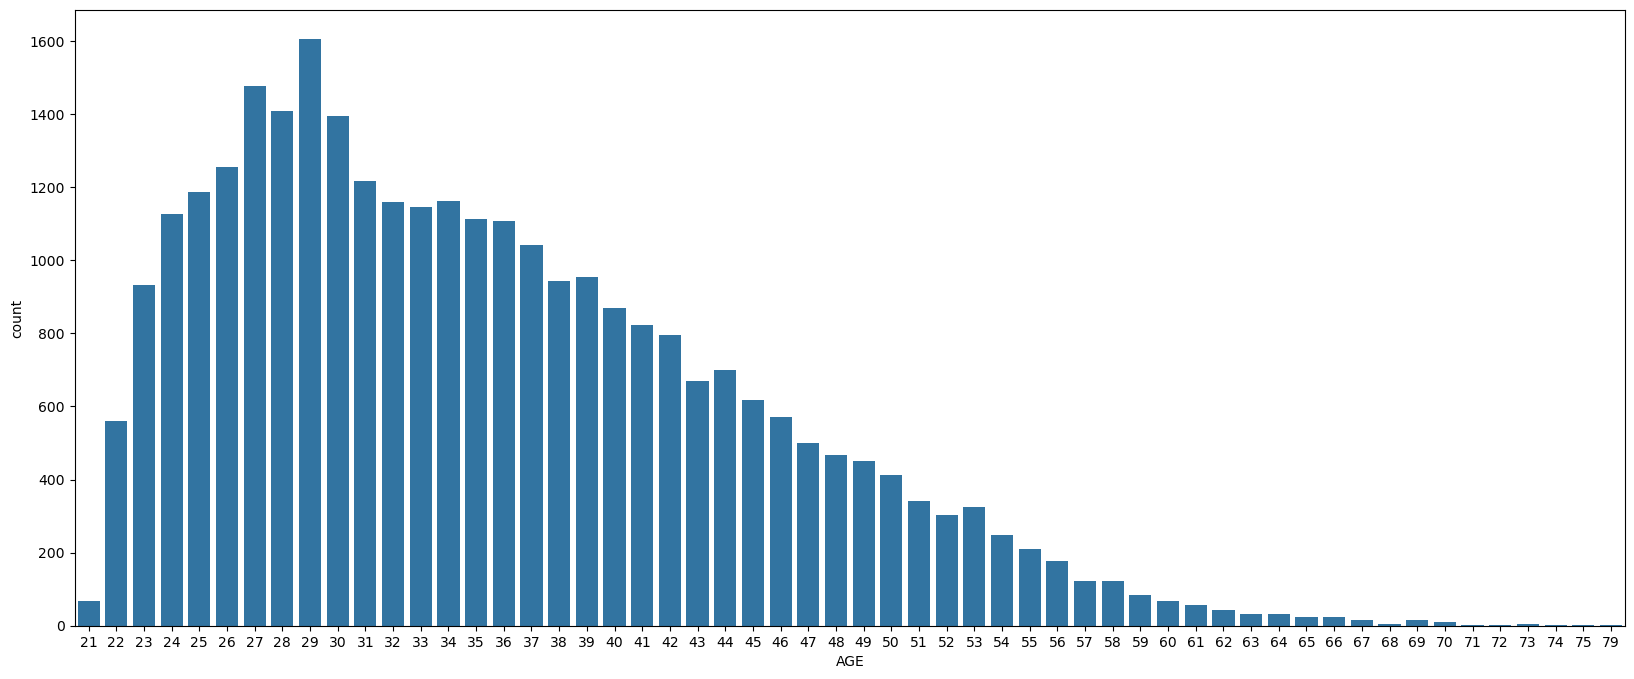

In [80]:
#age column
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = credit)

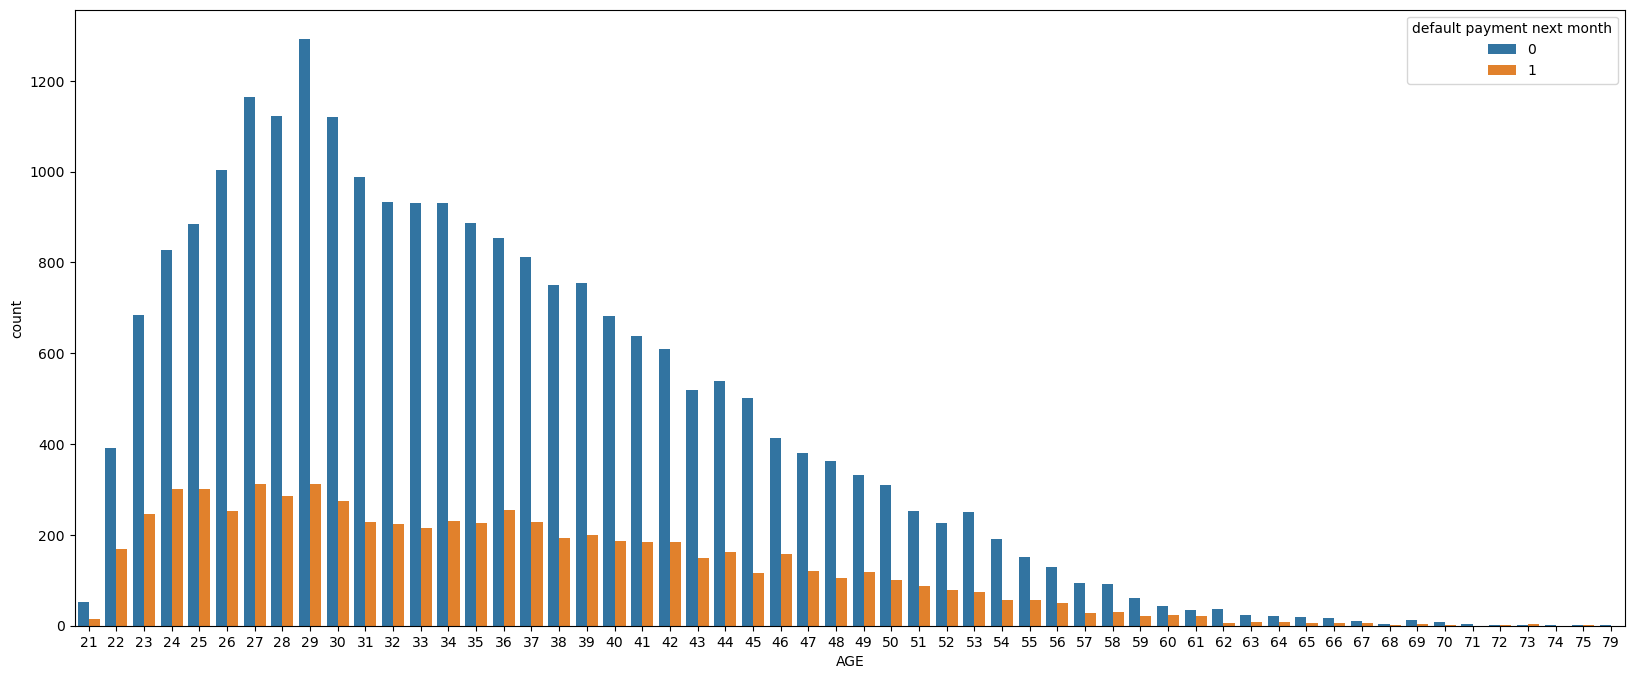

In [81]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'default payment next month', data = credit)
plt.show()

* **from above charts we can see following points**
**age 21 and 55-79 group use low credit card as having income less or no income**
**age 22-45 group use highest credit cards**
**age 29 use higest no of cards and defaulter is too equal also but 22-25 group is having more no of defaulter and as age decreasing no of defaulter is also increasing**
**those are single they dont use card and married and live in relationship people uses more no of cards and having defaulter is also almost same**
**female is using more no of card as compare to male and defaulter  is also more in case of females**


In [82]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [83]:
credit['PAY_0'].value_counts()

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

## Check the payment column

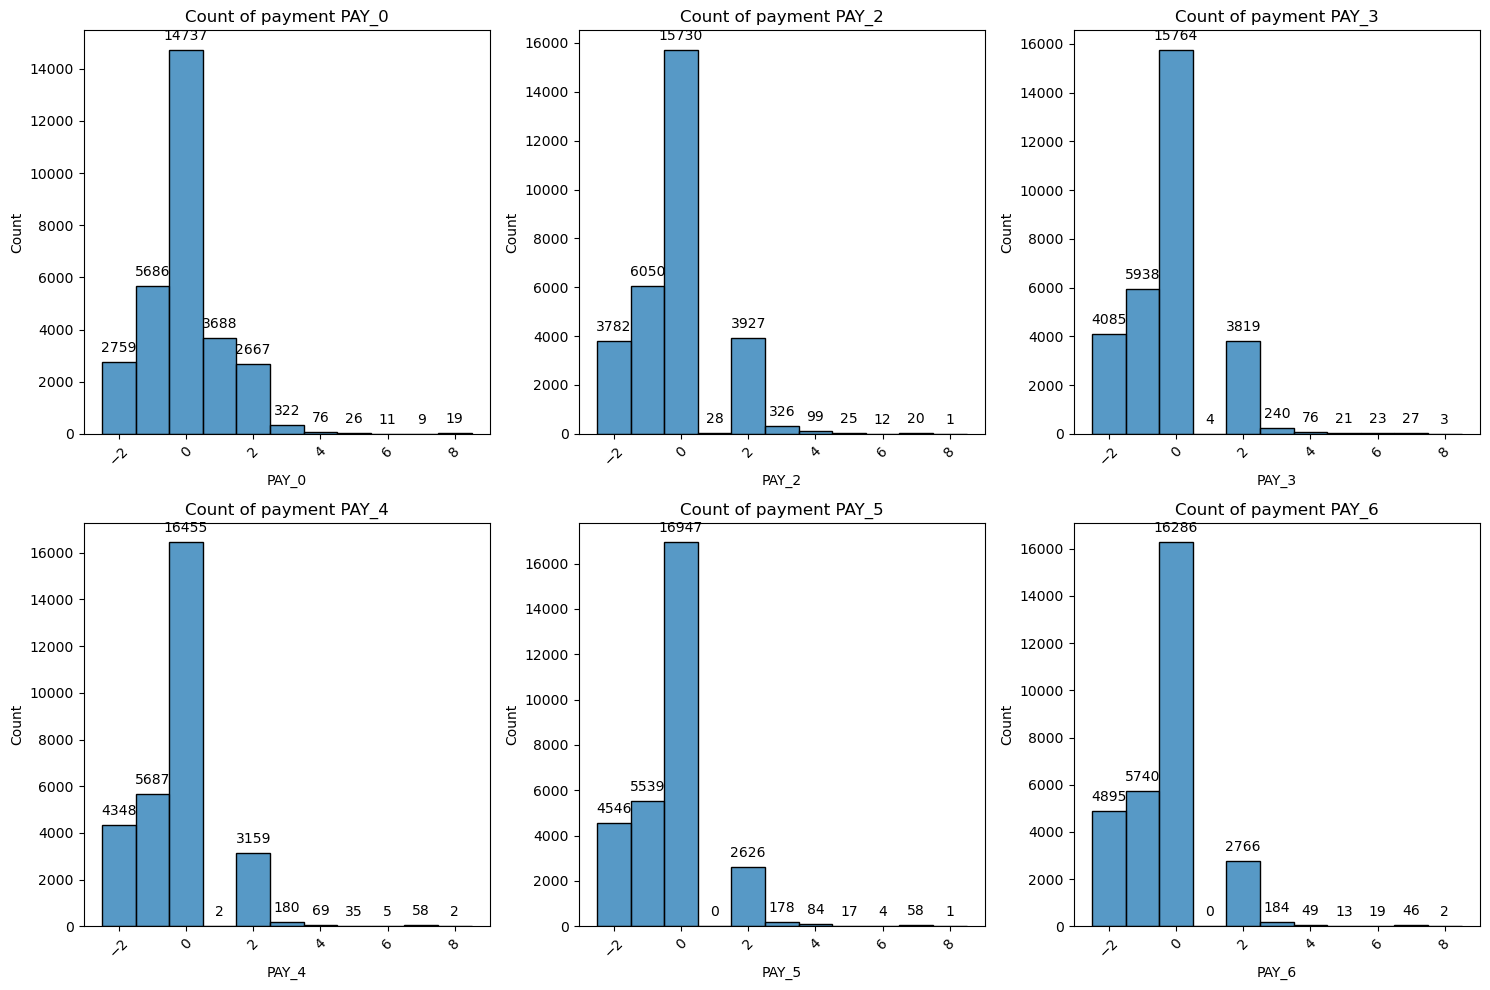

In [84]:
list1=['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
# visualizing the count of each by running a for loop
plt.figure(figsize=(15, 10))

# Loop through the list of columns to plot
for index, item in enumerate(list1):
    plt.subplot(2, 3, index + 1)
    sns.histplot(credit[item], kde=False, discrete=True)  # Plot the histogram
    plt.xticks(rotation=45)
    plt.title(f'Count of payment {item}')

    ax = plt.gca()

    # Annotate each bin with its count
    for p in ax.patches:
        height = p.get_height()  # Get the height of each bin
        ax.annotate(f'{int(height)}', 
                    xy=(p.get_x() + p.get_width() / 2, height),  # Position text in the center of each bar
                    xytext=(0, 5),  # Offset text by 5 points vertically
                    textcoords='offset points',
                    ha='center', va='bottom')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

* **as here can see payment 0 (paymnent done ishigh range ) among all data paymnet not (-2,-1) ia also look quiet smililar**

## check for bill amount column

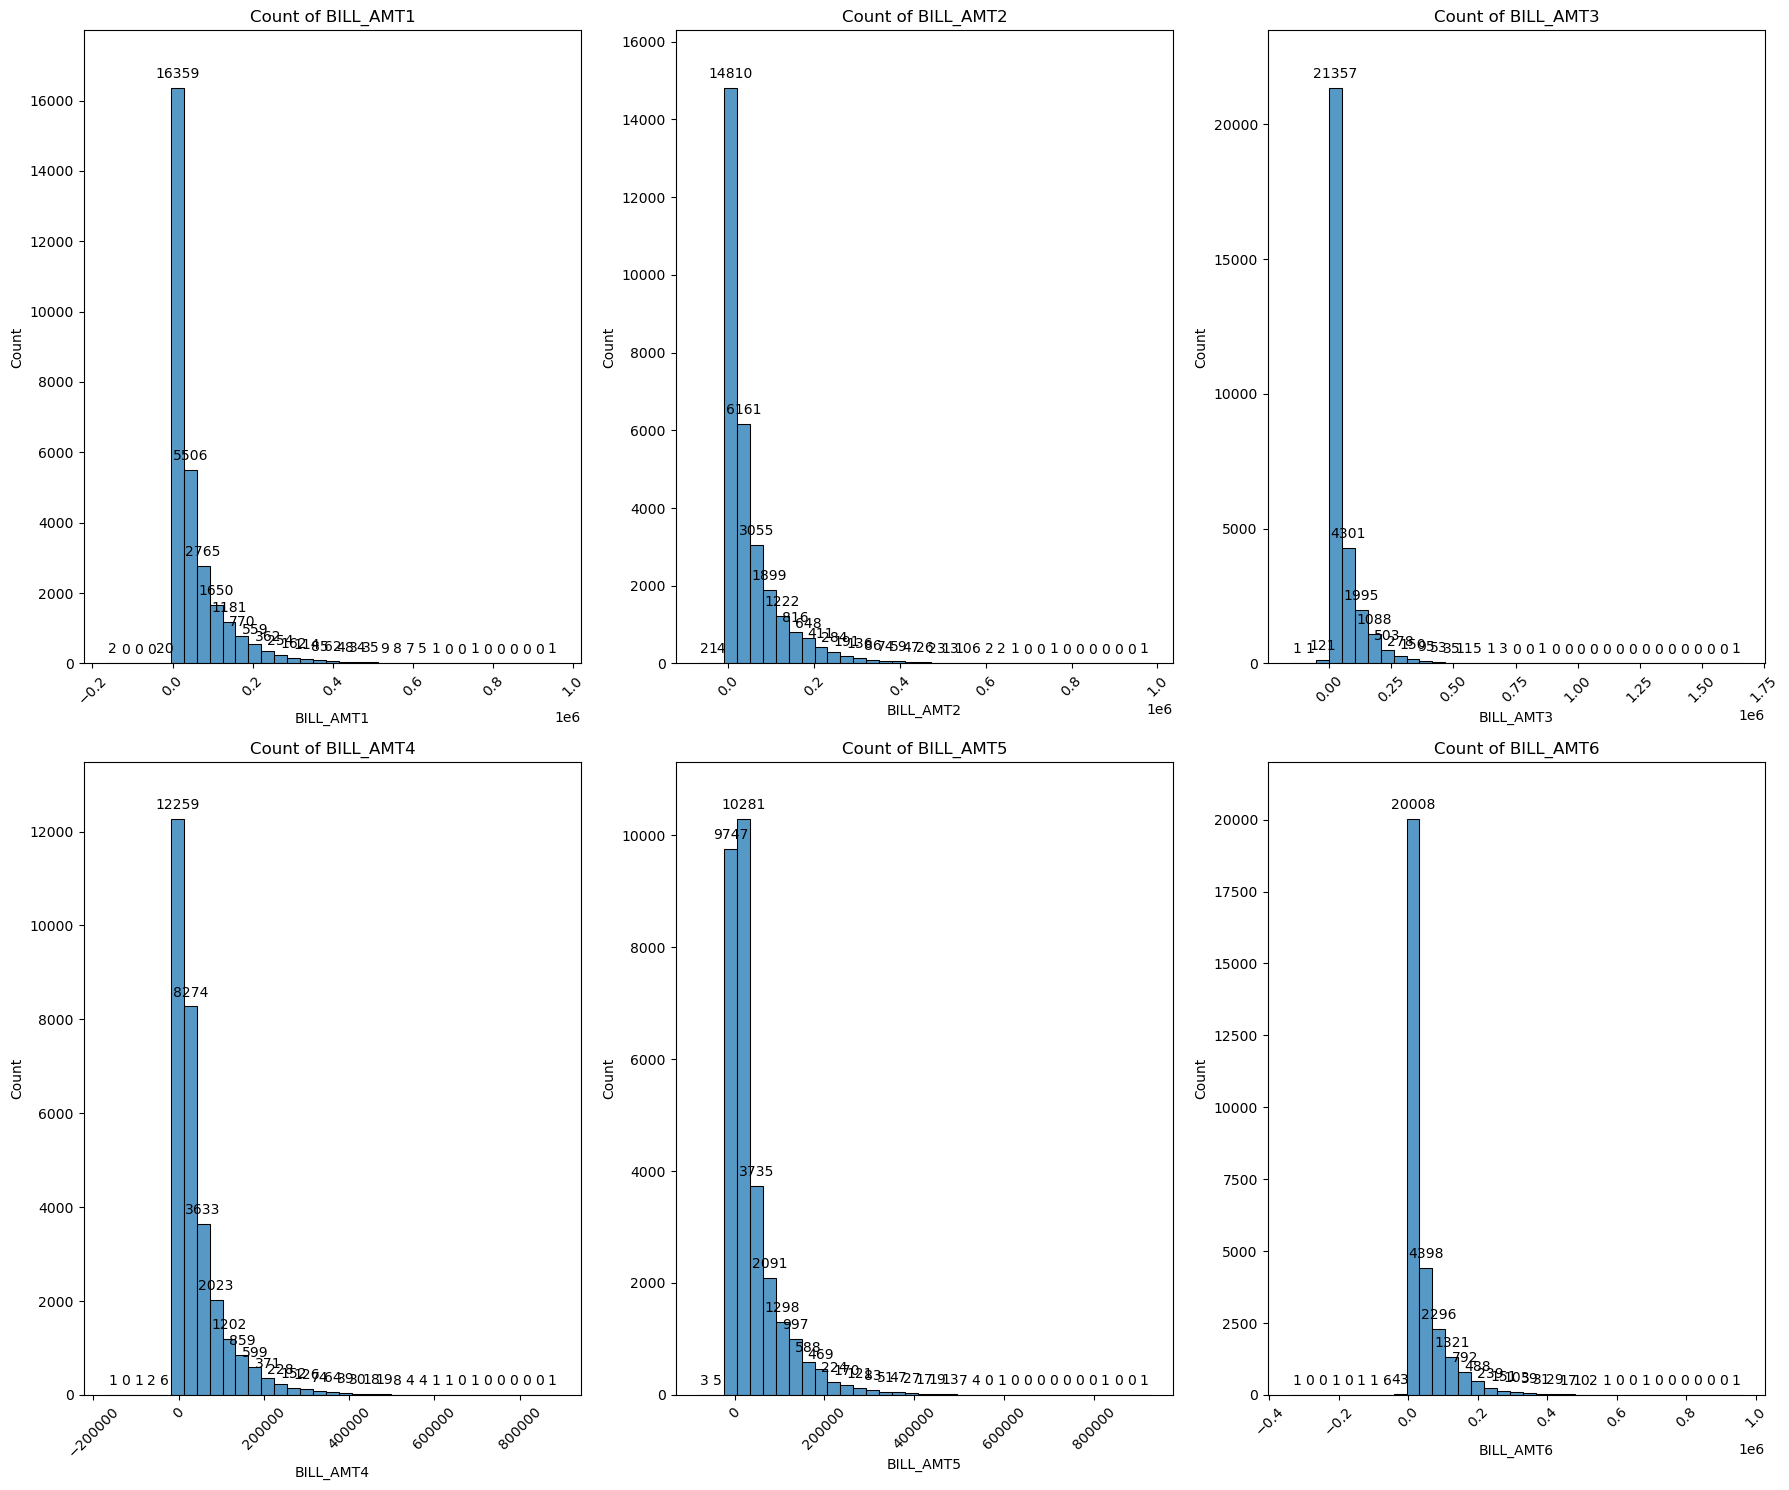

In [85]:
list1 = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Visualizing the count of each column
plt.figure(figsize=(18, 15))

for index, item in enumerate(list1):
    plt.subplot(2, 3, index + 1)
    sns.histplot(credit[item], bins=35, kde=False)  # Adjusting bins for better granularity
    plt.xticks(rotation=45)
    plt.title(f'Count of {item}')
    
    ax = plt.gca()
    # Annotate each bin with its count
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # Vertical offset for text
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=10, color='black')
    
    # Setting y-axis limit to reduce clutter and improve readability
    plt.ylim(0, max([rect.get_height() for rect in ax.patches]) * 1.1)

plt.tight_layout()
plt.show()

**all bill amount to be paid looks quite similar**

## for pay_amt column data

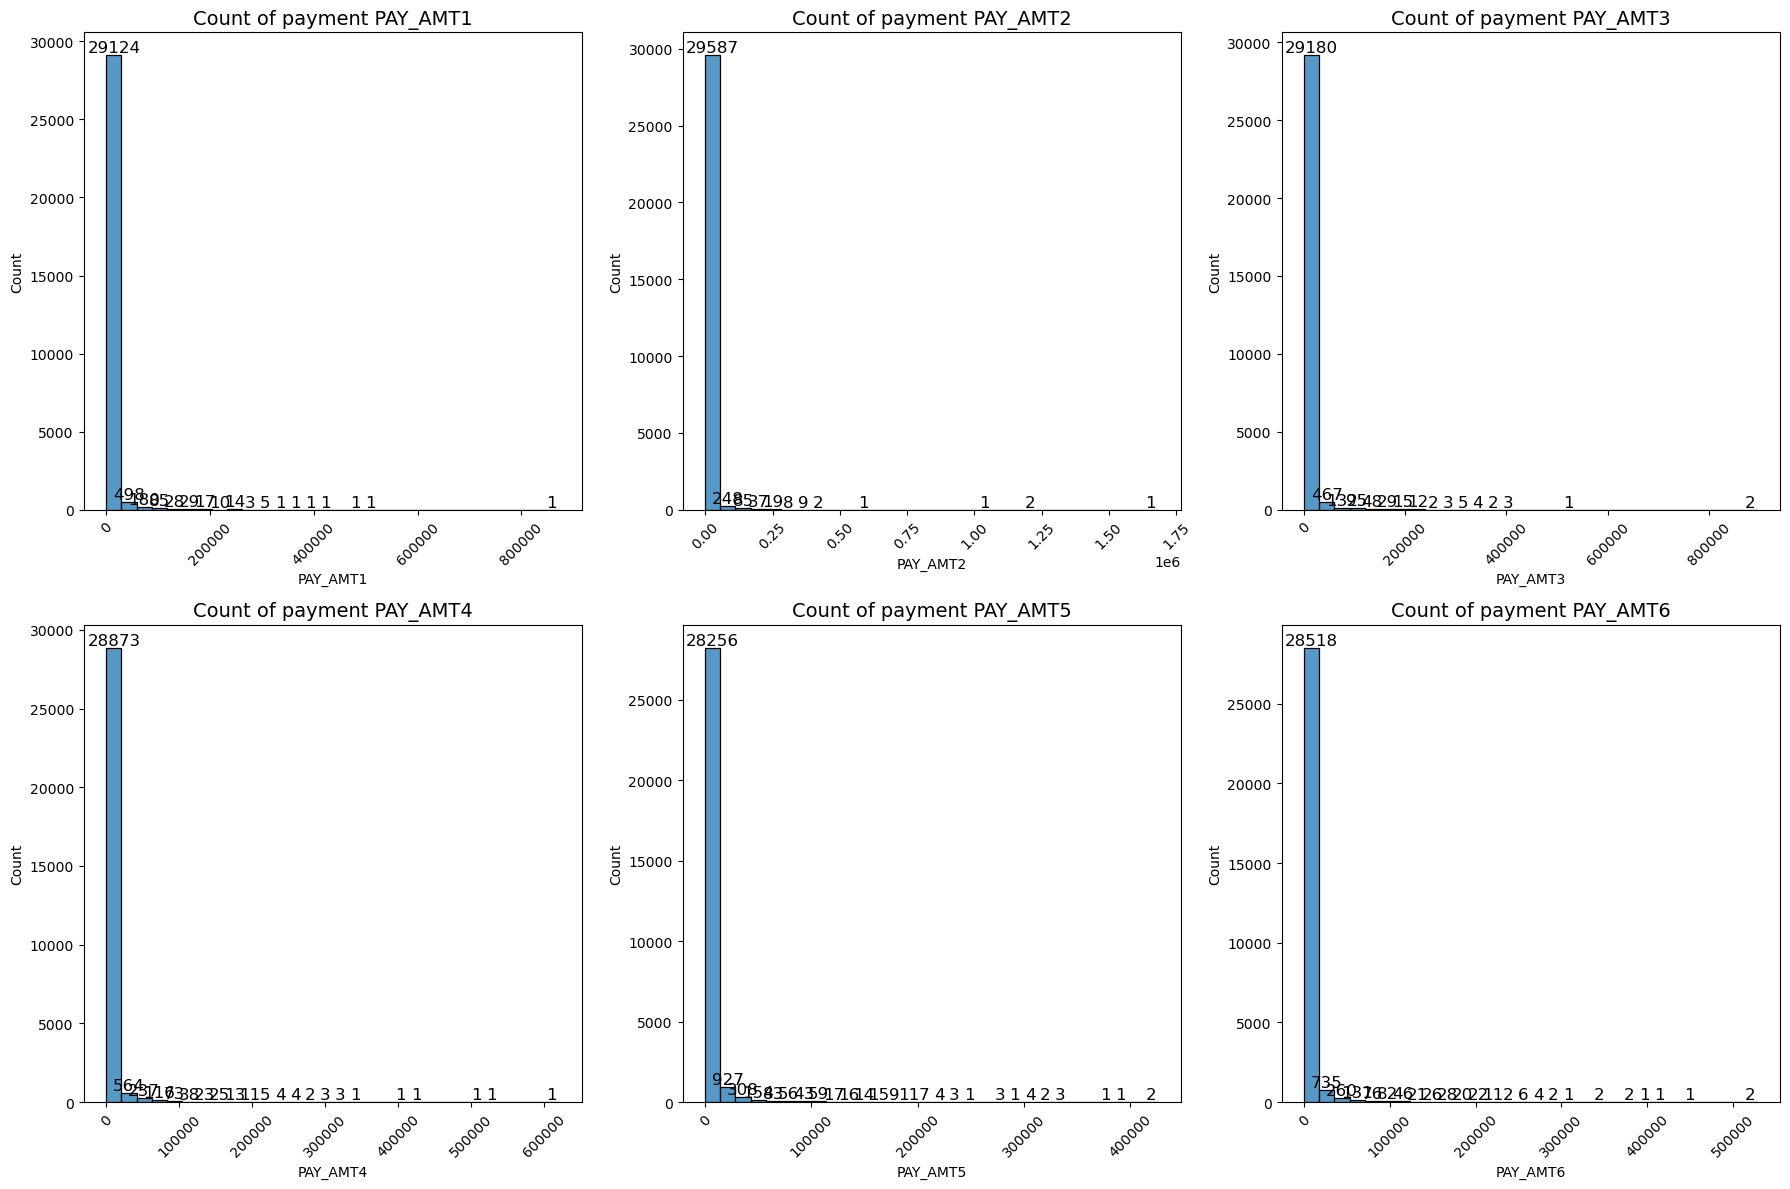

In [86]:
list1 = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Set up the figure
plt.figure(figsize=(18, 12))

# Loop through the columns
for index, item in enumerate(list1):
    plt.subplot(2, 3, index + 1)
    sns.histplot(credit[item], kde=False, bins=30)  # Adjust bins for clarity
    plt.xticks(rotation=45)
    plt.title(f'Count of payment {item}', fontsize=14)

    ax = plt.gca()

    # Annotate each bin with its count
    for rect in ax.patches:
        height = rect.get_height()  # Get the height of each bin
        if height > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, height, 
                    f'{int(height)}', ha='center', va='bottom', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# visulazie of low range value columns
# Visualizing stats of these variables using box plots



Text(0.5, 1.0, 'Box plot for low range variables')

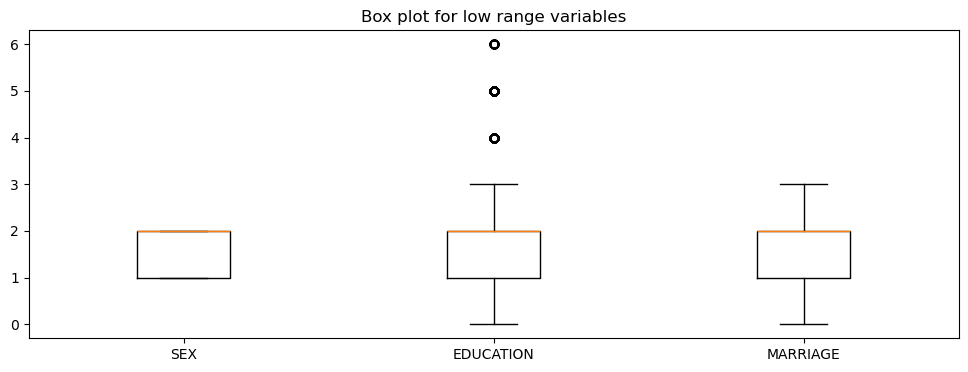

In [87]:
plt.figure(figsize=(12,4))
xtick=[1,2,3]
label=['SEX','EDUCATION','MARRIAGE']
plt.boxplot(credit[['SEX','EDUCATION','MARRIAGE']].values)
plt.xticks(xtick,label)
plt.title('Box plot for low range variables')

* **as see sex and marraige no outliers but education see some but as pervious seen data education having values upto 6 so values not an outliers according to data**

Text(0.5, 1.0, 'Box plot for low range variables')

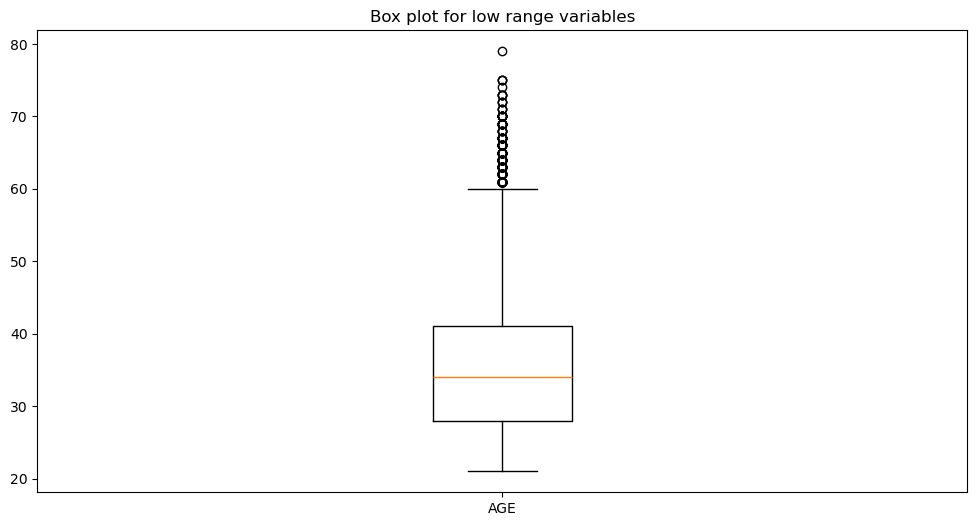

In [88]:
# For age column
plt.figure(figsize=(12,6))
xtick=[1]
label=['AGE']
plt.boxplot(credit['AGE'].values)
plt.xticks(xtick,label)
plt.title('Box plot for low range variables')

* **as we saw pervious upto 79 age people are using credit card so here we cans see after 60 all are outliers but thats not true**

**mean value is 35 of age group**

## now we look for payment column seprate

Text(0.5, 1.0, 'Box plot for payment variables')

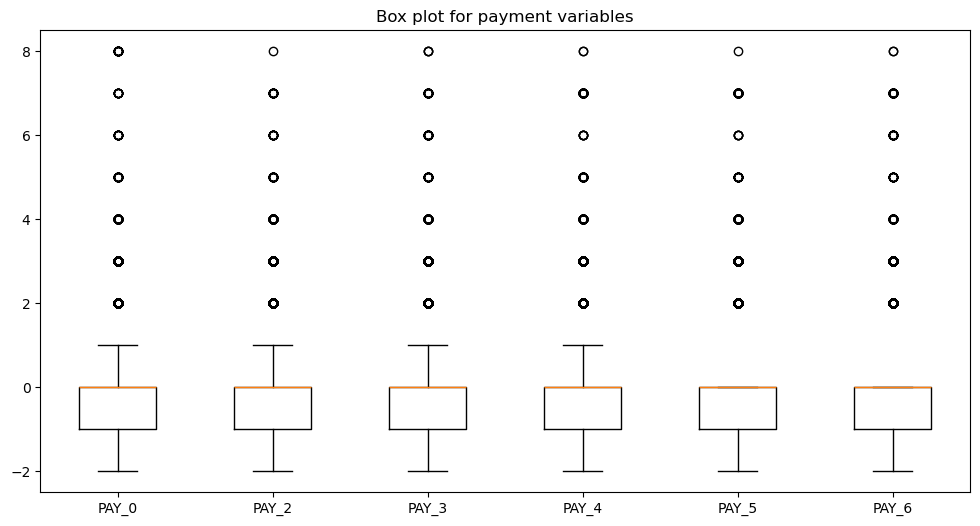

In [89]:
plt.figure(figsize=(12,6))
xtick=[1,2,3,4,5,6]
label=['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.boxplot(credit[['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].values)
plt.xticks(xtick,label)
plt.title('Box plot for payment variables')

* **all positive numbers are indicating the number isntallment paid by user**
**0 is median value of no due**

# for bill amount column

Text(0.5, 1.0, 'Box plot for bill payment variables')

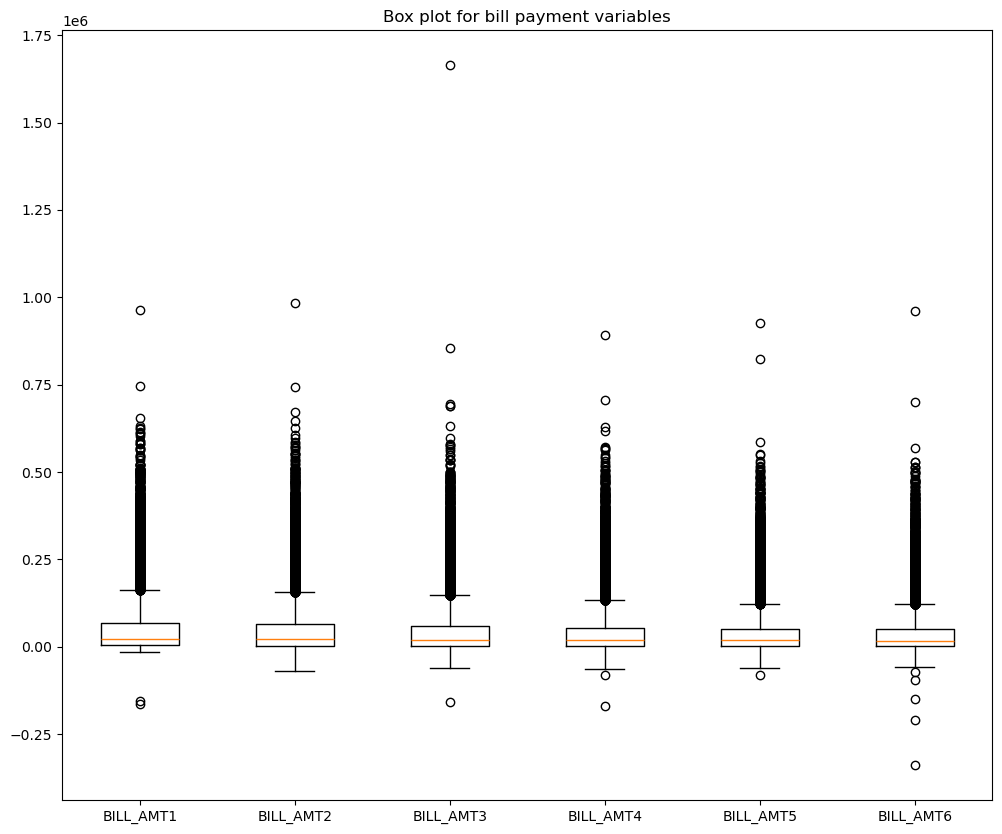

In [90]:
plt.figure(figsize=(12,10))
xtick=[1,2,3,4,5,6]
label=['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.boxplot(credit[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].values)
plt.xticks(xtick,label)
plt.title('Box plot for bill payment variables')

**no outleirs as seen bill amount having values showing in outliers**

**showing amount of bills**

Text(0.5, 1.0, 'Box plot for  payment done variables')

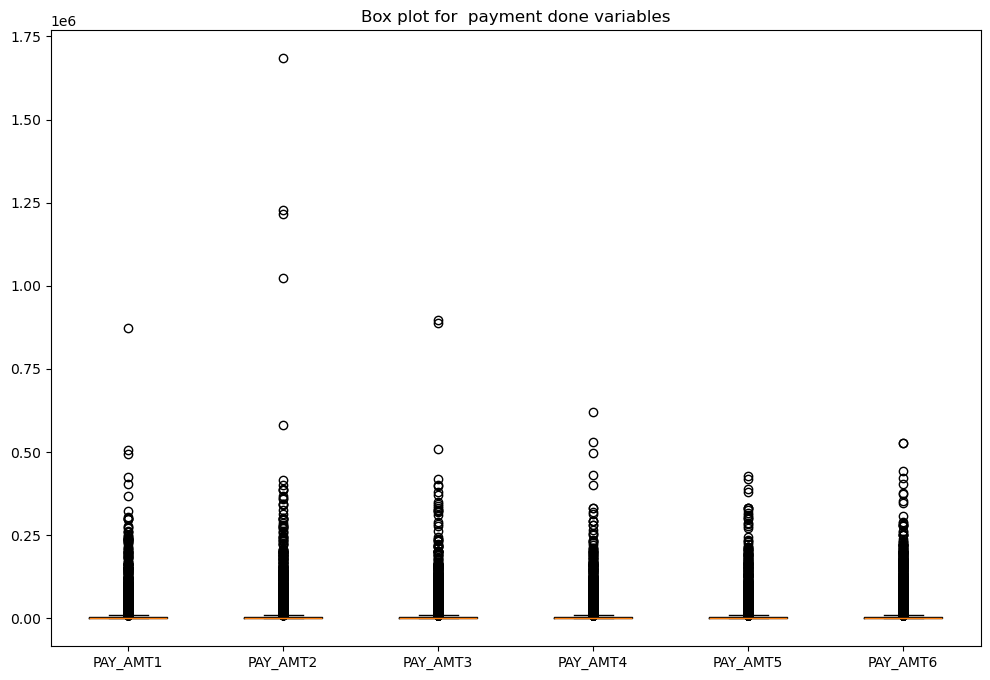

In [91]:
plt.figure(figsize=(12,8))
xtick=[1,2,3,4,5,6]
label=['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.boxplot(credit[['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values)
plt.xticks(xtick,label)
plt.title('Box plot for  payment done variables')

**no outliers as payamount having values as seen in charts**

**In this section we will try to find relationship of each variables, their importance and impact on our dependent variable.**

Text(0.5, 1.0, 'Heatmap')

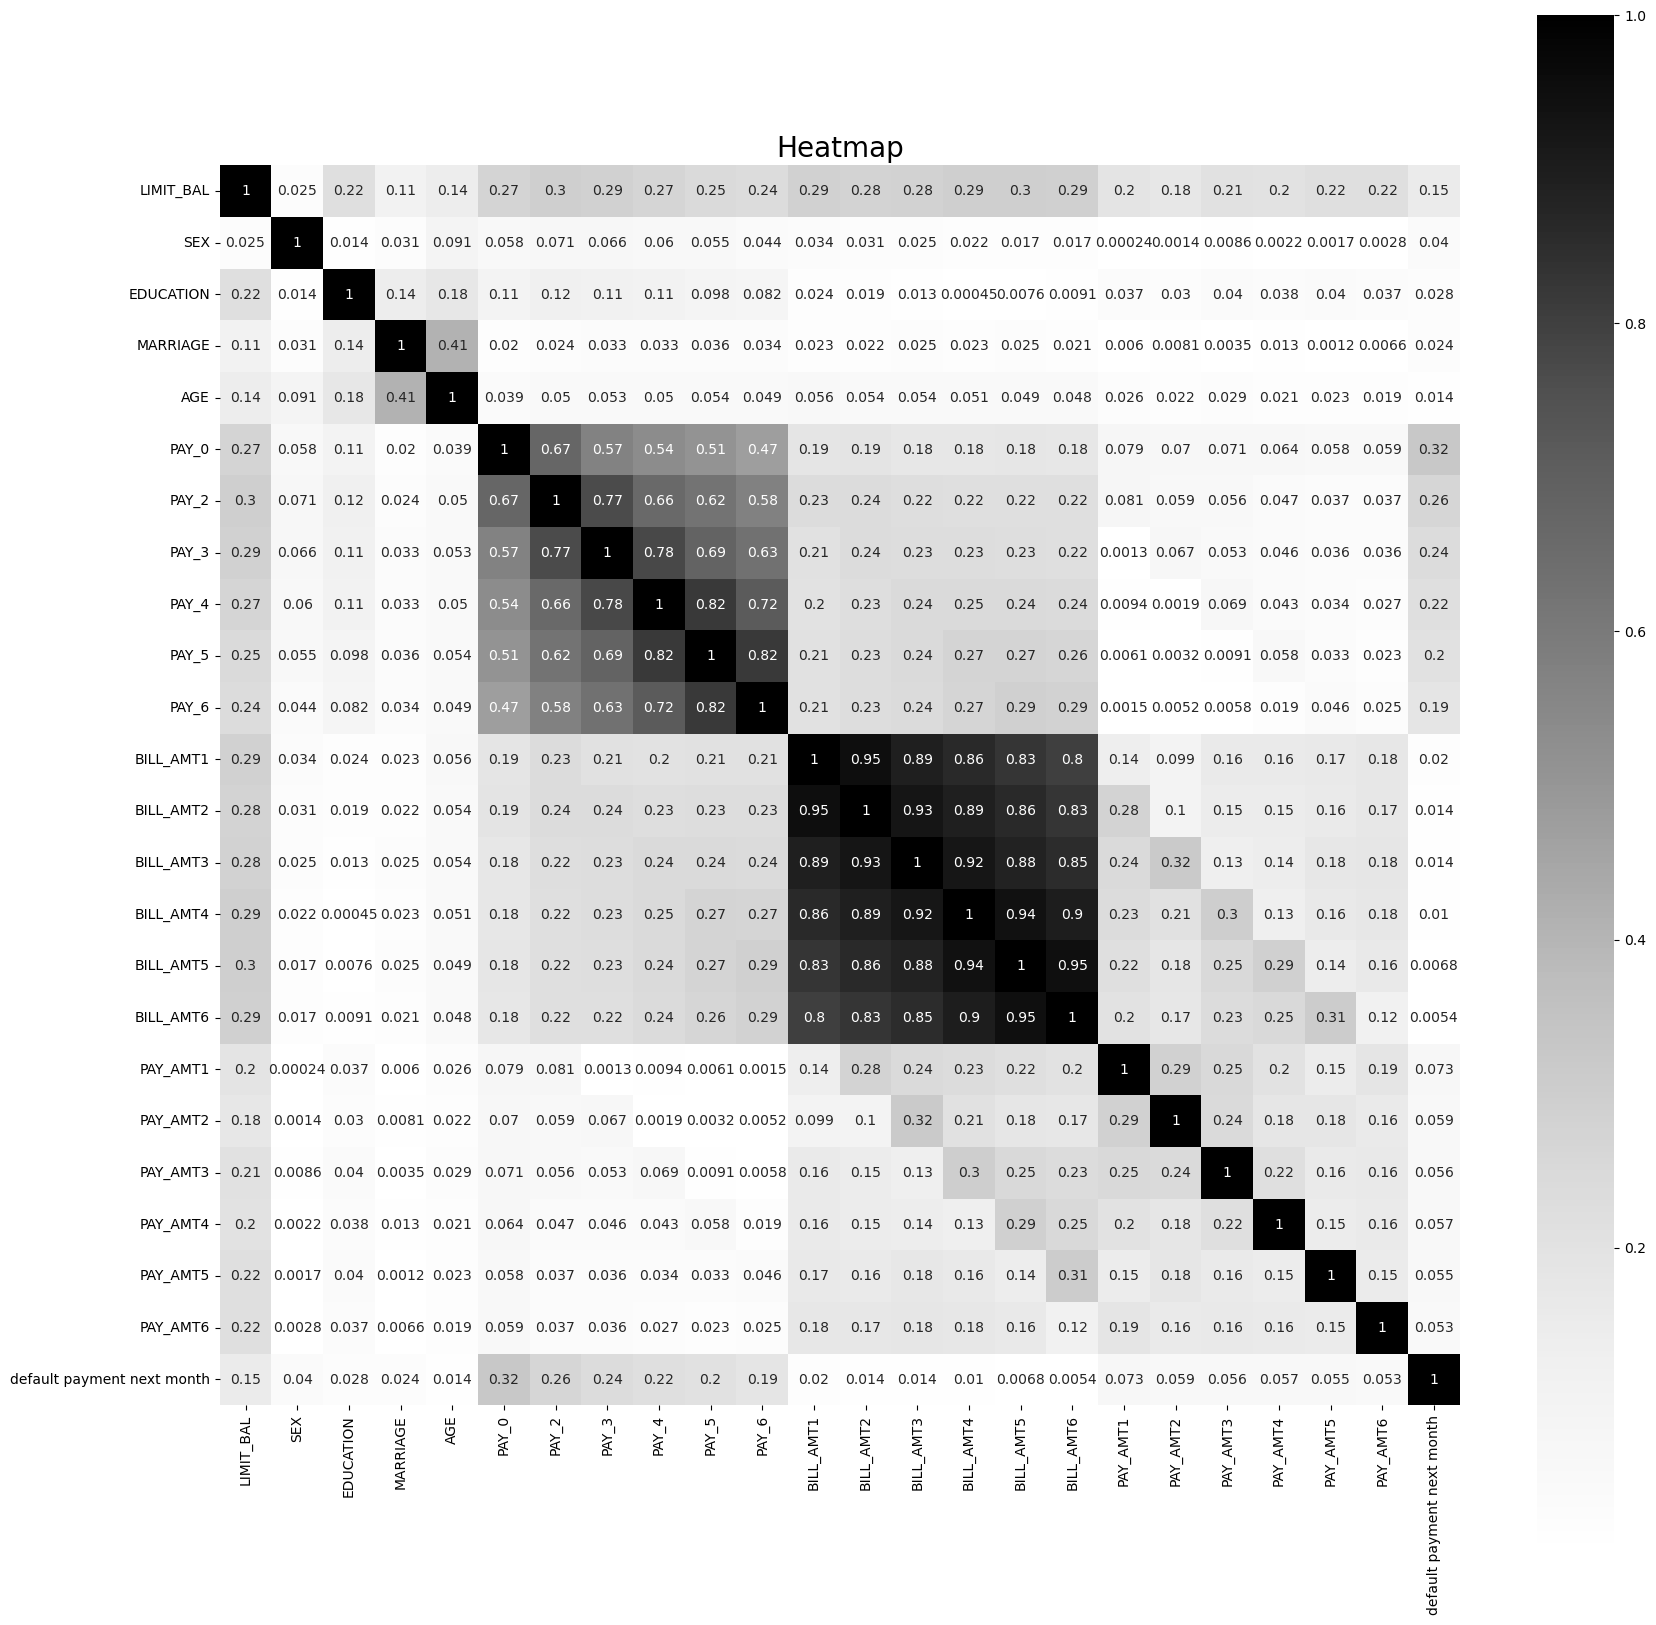

In [92]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(credit.corr()),annot=True, cmap='Greys',square=True)
plt.title('Heatmap',fontsize=20)

**pay column are slighly corelated with dependant column no other columns having strong corealation with depenedant column**

# check corelation with independant column with dependant column

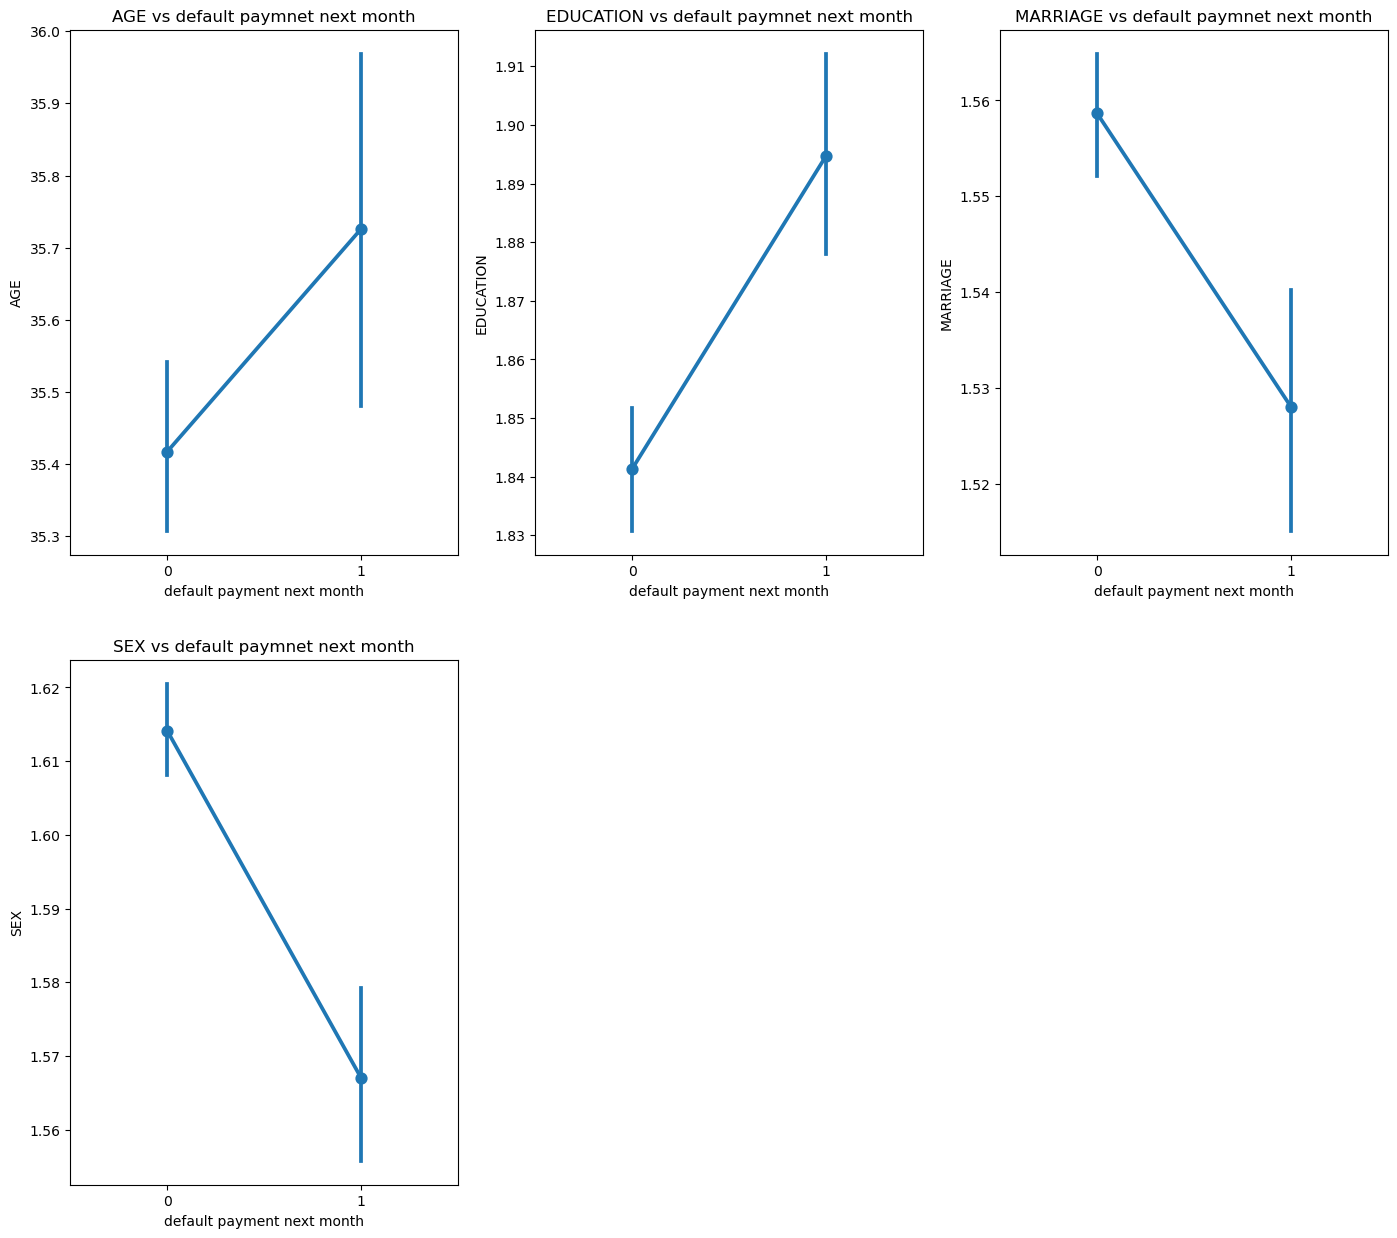

In [93]:
list1=['AGE','EDUCATION','MARRIAGE','SEX']
plt.figure(figsize=(17,15))
for index,item in enumerate(list1):
  plt.subplot(2,3,index+1)
  sns.pointplot(x='default payment next month',y=item,data=credit)
  plt.title(f'{item} vs default paymnet next month')

**here can see as age between 35-40 defaulter increase, qualification of high school and primary college defaulter increase in marriage values getting to um=nmarried and married data defaulter decreses and in sex values getiing towards male defaulter decreases**

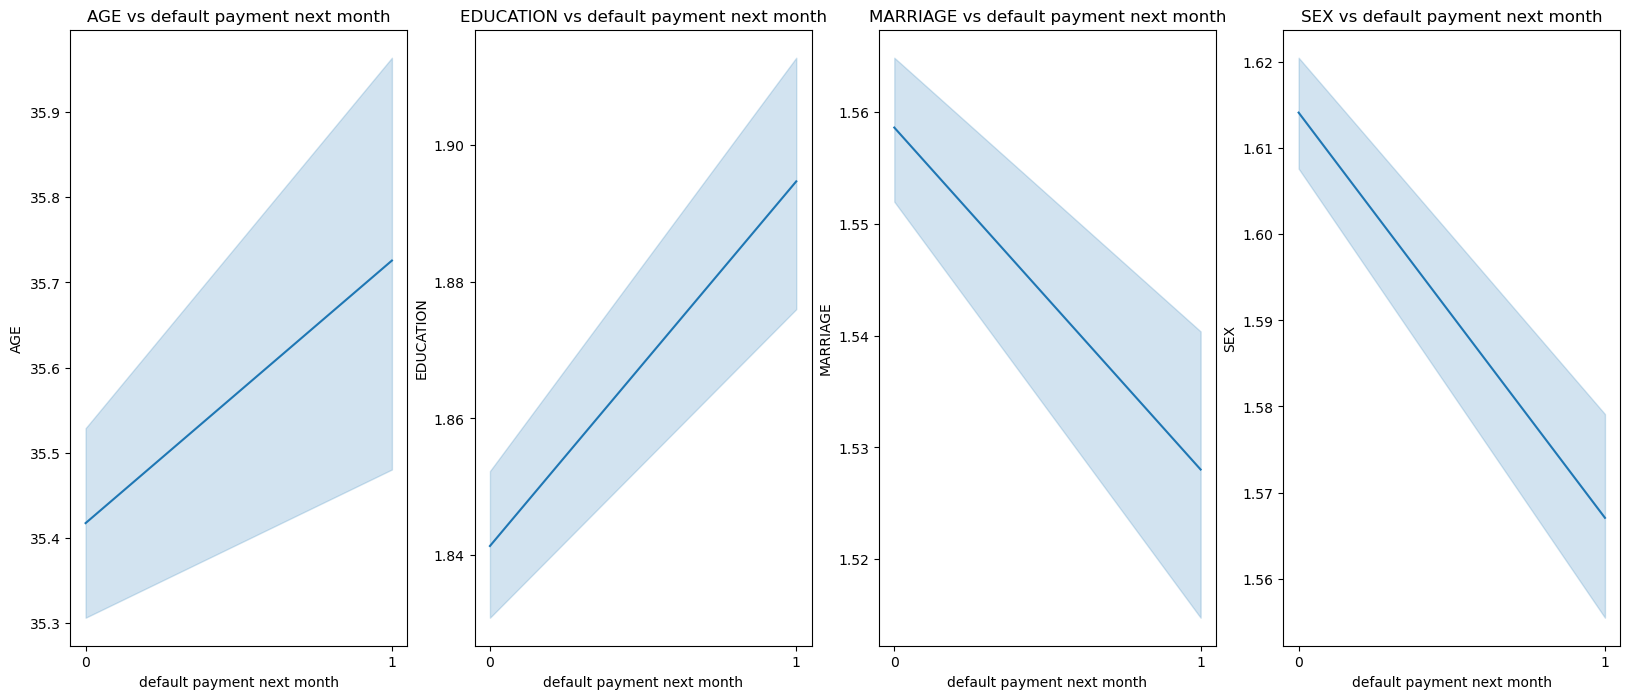

In [94]:
list1=['AGE','EDUCATION','MARRIAGE','SEX']
plt.figure(figsize=(20,8))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,4,index+1)
  plt.xticks(xtick)
  sns.lineplot(x='default payment next month',y=item,data=credit)
  plt.title(f'{item} vs default payment next month')

**as age increasing defaulter get incresed**
**as education 

**Realtion between dependant and payment column**

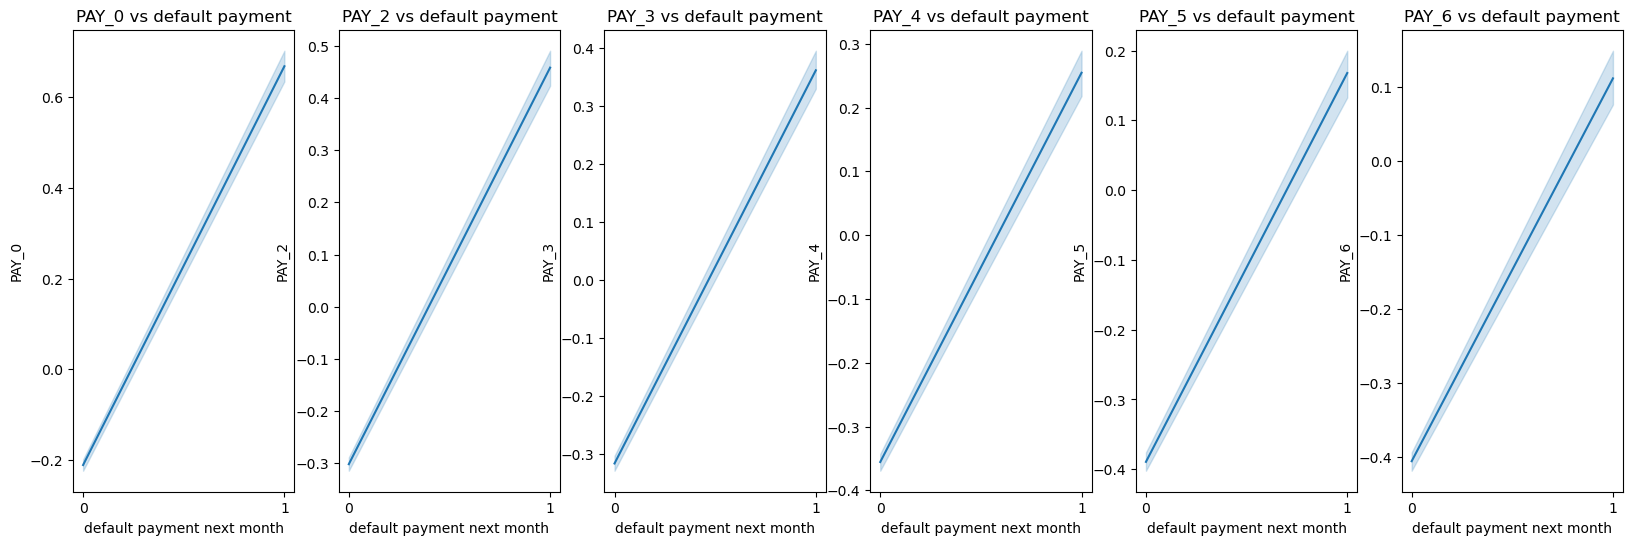

In [95]:
list1=['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(20,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3,4,5]
  plt.subplot(1,6,index+1)
  plt.xticks(xtick)
  sns.lineplot(x='default payment next month',y=item,data=credit)
  plt.title(f'{item} vs default payment')

**relation with bill payment column**

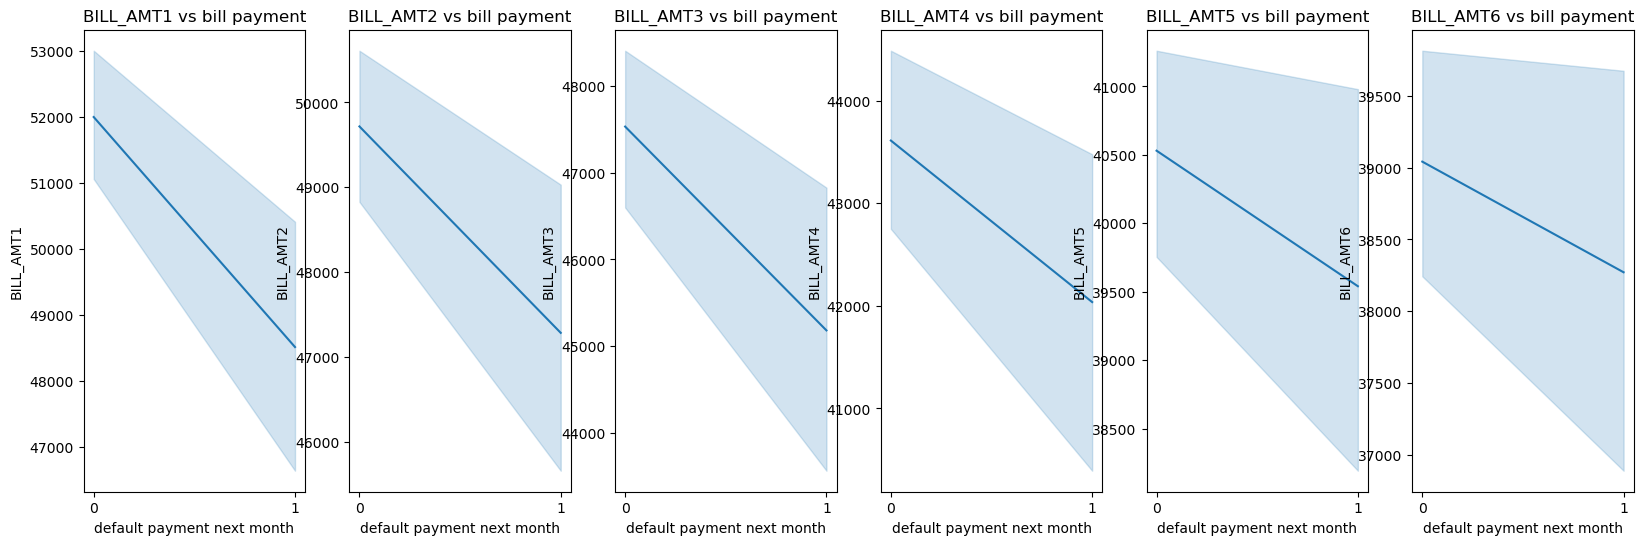

In [96]:
list1=['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(20,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3,4,5]
  plt.subplot(1,6,index+1)
  plt.xticks(xtick)
  sns.lineplot(x='default payment next month',y=item,data=credit)
  plt.title(f'{item} vs bill payment')

**actual payment relation with dependant**

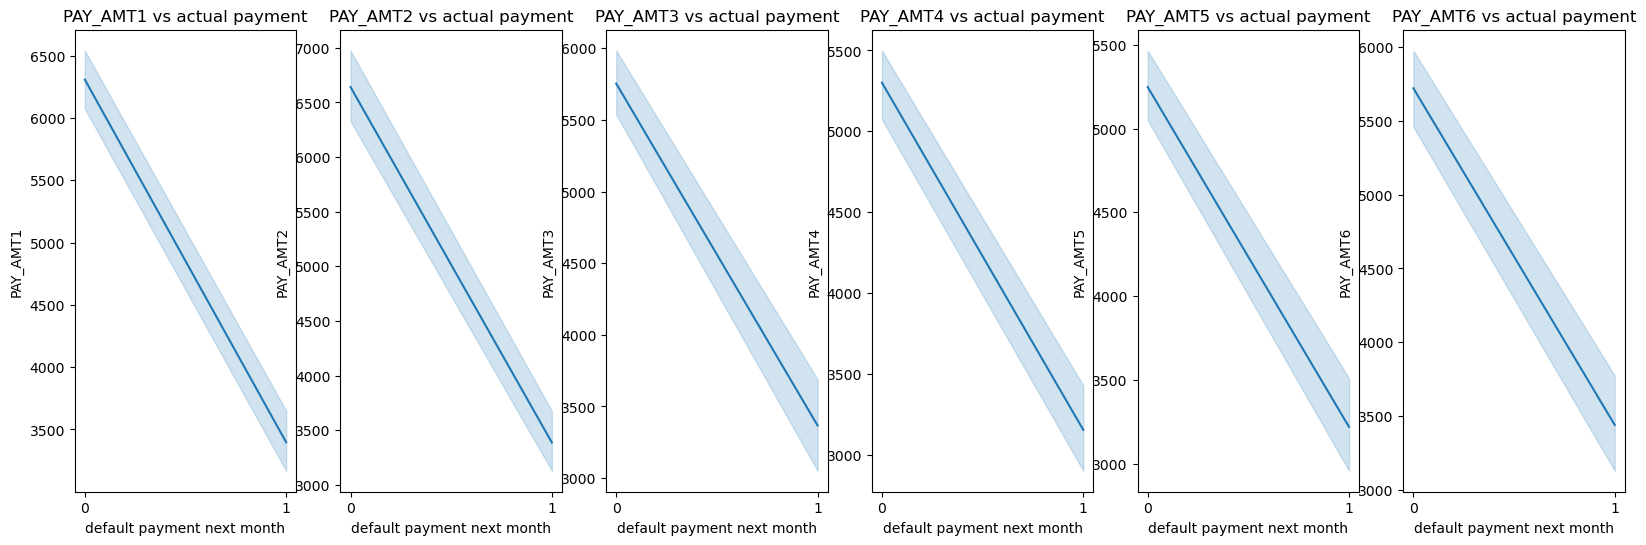

In [97]:
list1=['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(20,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3,4,5]
  plt.subplot(1,6,index+1)
  plt.xticks(xtick)
  sns.lineplot(x='default payment next month',y=item,data=credit)
  plt.title(f'{item} vs actual payment')

## DATA WRANGLING

In [98]:
# Check the null values
credit.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No null values present in data**

## outliers check

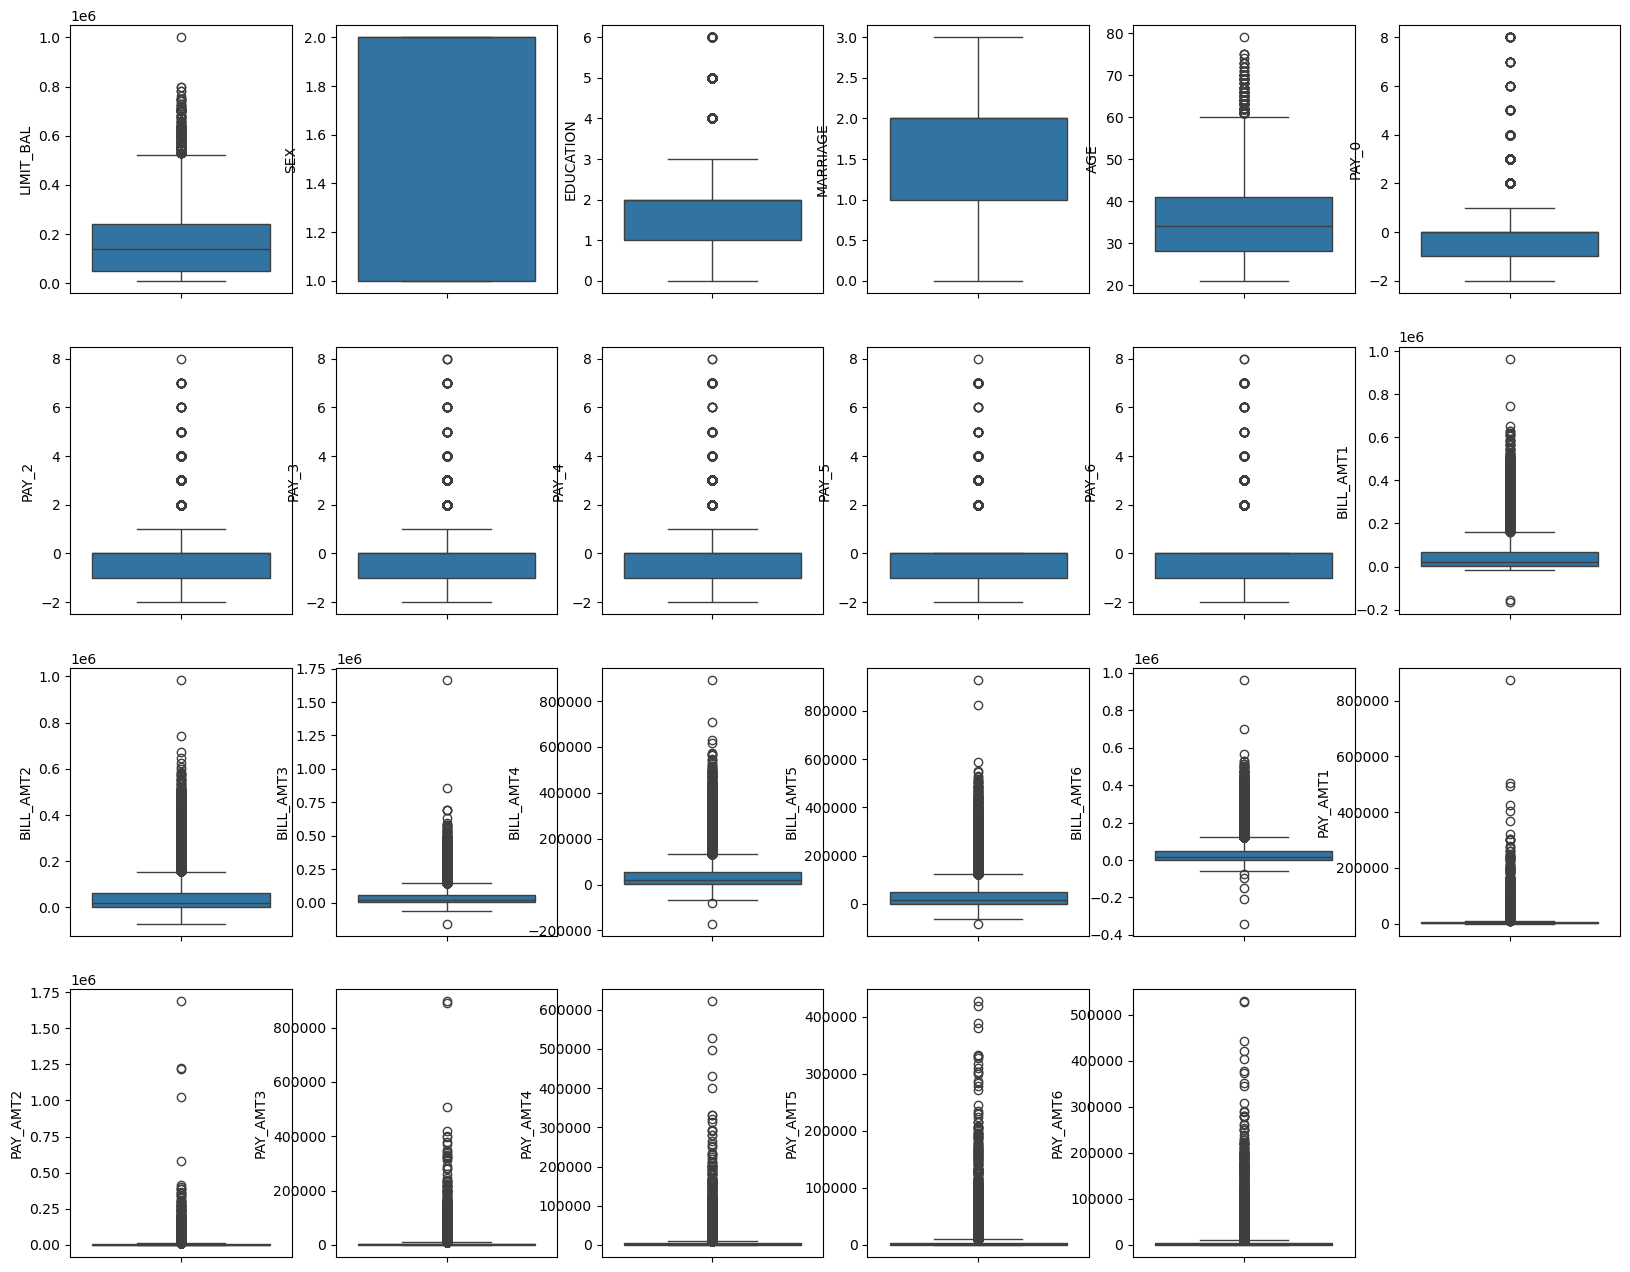

In [99]:
# Checking outliers for discrete and continous type variables using box plot

list1=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(20,16))
for index,item in enumerate(list1):
  plt.subplot(4,6,index+1)
  sns.boxplot(credit[item])

**all outliers all not ouliers because values actually related with data**

# Feauture Engineering

In [100]:
# do average of bill column
credit['bill_amt_avg']=credit[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

In [101]:
# drop the older bill column
credit.drop(['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],axis=1,inplace=True)

In [102]:
#do average of pay amt column
credit['pay_amt_avg']=credit[['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

In [103]:
#drop the pay amt column
credit.drop(['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis=1,inplace=True)

In [104]:
#do average of pay amt column
credit['pay_0']=credit[['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
]].mean(axis=1)

In [105]:
#drop the pay amt column
credit.drop(['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],axis=1,inplace=True)

In [106]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'default payment next month', 'bill_amt_avg', 'pay_amt_avg', 'pay_0'],
      dtype='object')

# Check the skewness

In [107]:
from scipy.stats import skew

LIMIT_BAL
0.27664154691282344


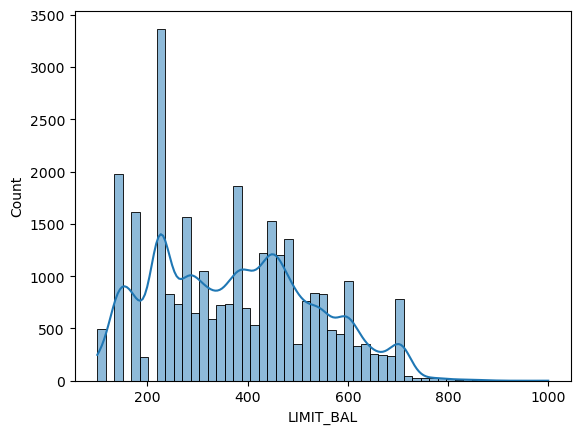

SEX
-0.4241622176497638


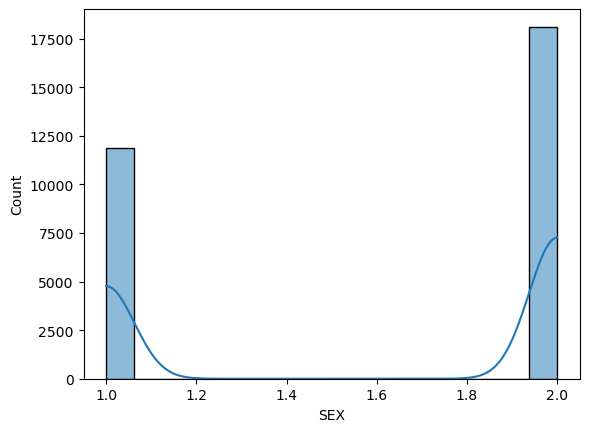

EDUCATION
0.3224960371912347


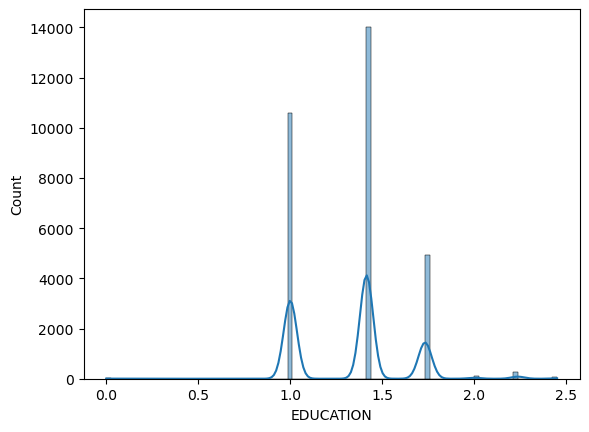

MARRIAGE
-0.01874074391724496


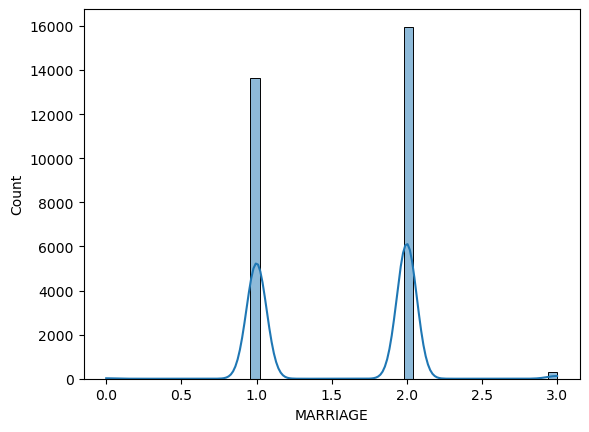

AGE
0.47921836612853996


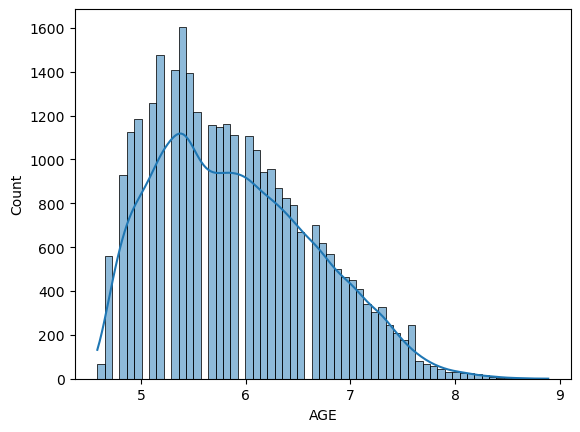

default payment next month
1.3434367747652611


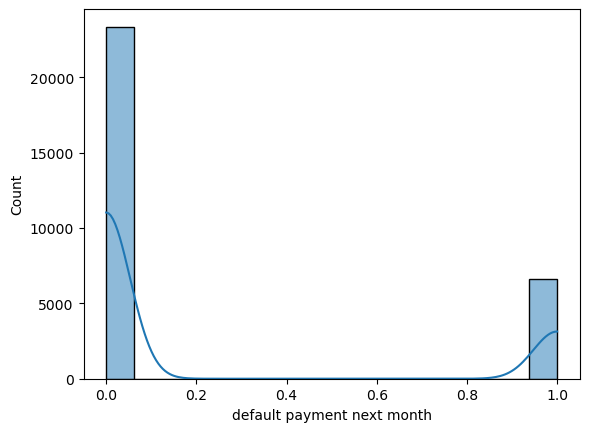

bill_amt_avg
2.7346071626471473


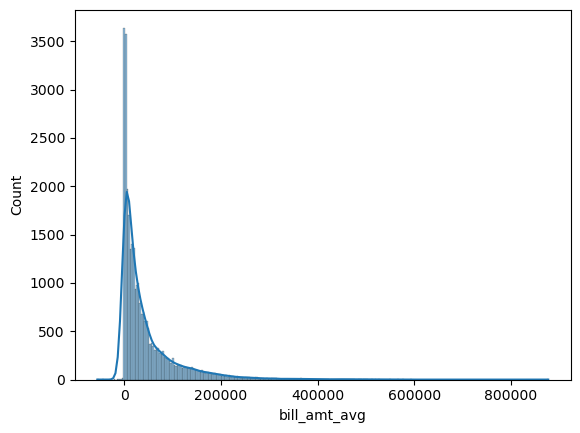

pay_amt_avg
-0.018578126237095816


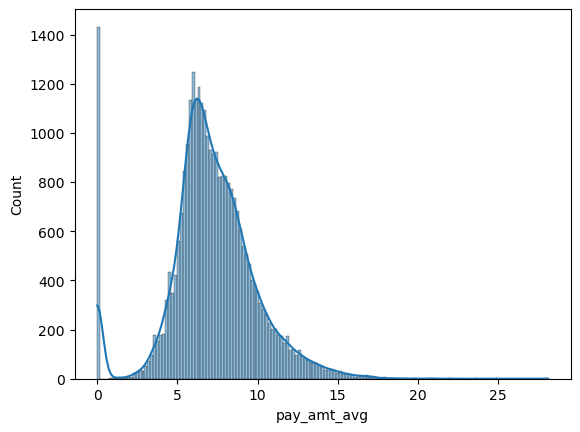

pay_0
0.6921303259511576


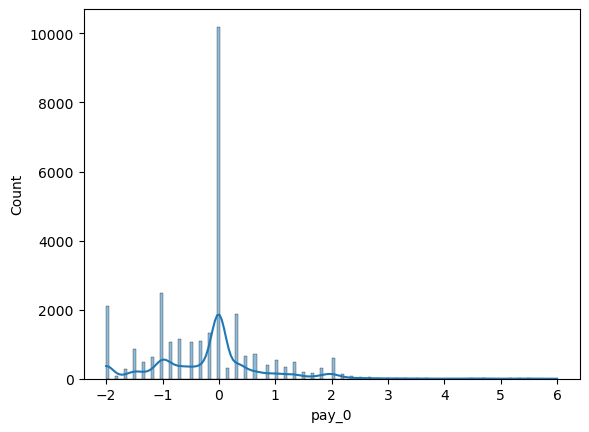

In [115]:
for col in credit:
    print(col)
    print(skew(credit[col]))

    plt.figure()
    sns.histplot(credit[col], kde=True)
    plt.show()

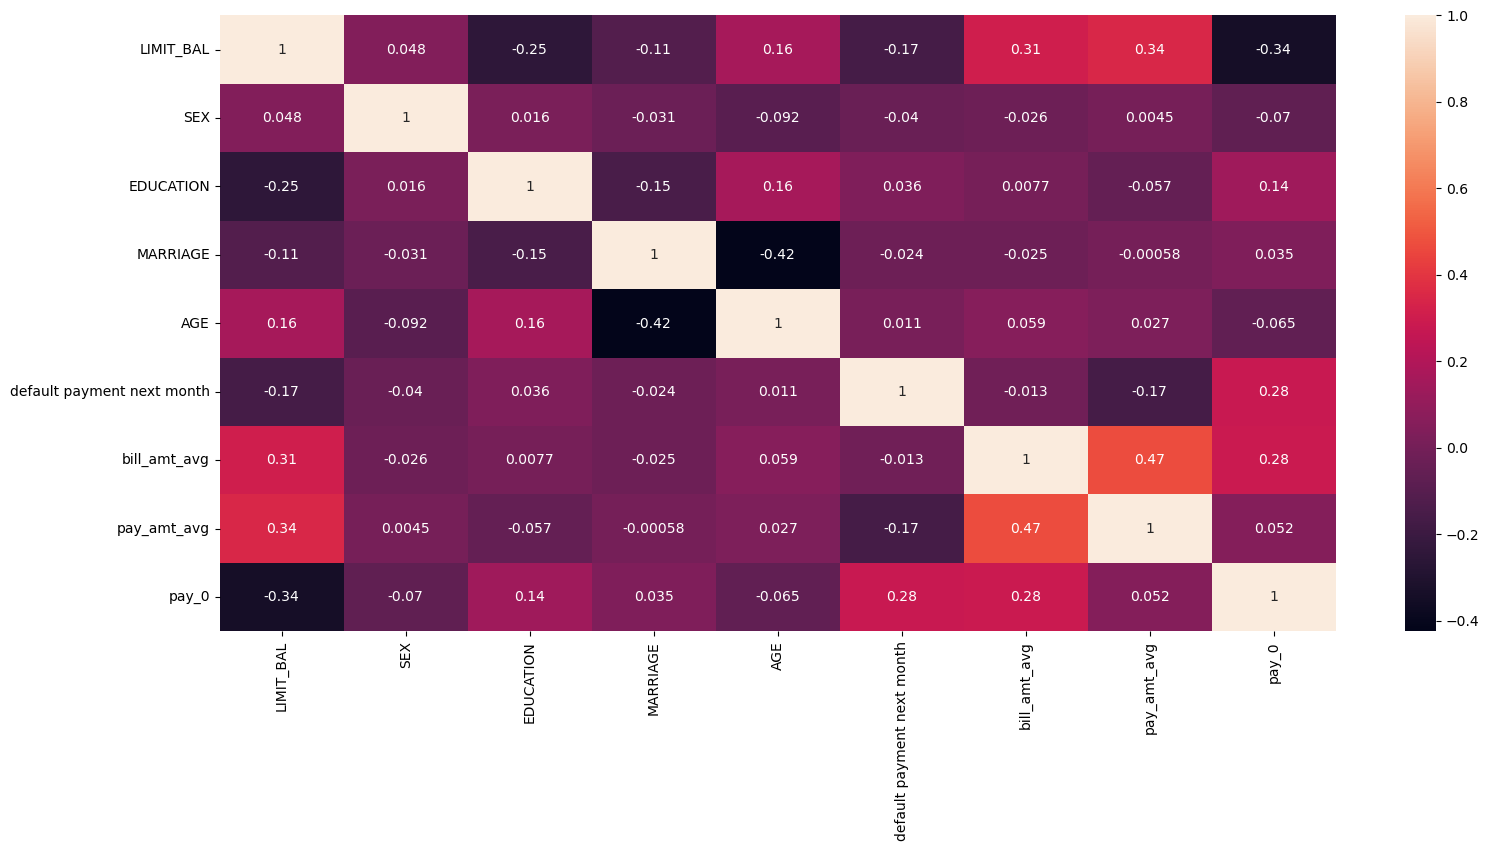

In [116]:
plt.figure(figsize=(18,8))
sns.heatmap(credit.corr(),annot=True)
plt.show()

In [602]:
#credit['PAY_AMT6']=np.sqrt(credit['PAY_AMT6'])

In [604]:
#credit['PAY_AMT5']=np.sqrt(credit['PAY_AMT5'])

In [606]:
#credit['PAY_AMT4']=np.sqrt(credit['PAY_AMT4'])

In [608]:
#credit['PAY_AMT3']=np.sqrt(credit['PAY_AMT3'])

In [610]:
#credit['PAY_AMT2']=np.sqrt(credit['PAY_AMT2'])

In [612]:
#credit['PAY_AMT1']=np.sqrt(credit['PAY_AMT1'])

In [114]:
credit['pay_amt_avg']=np.sqrt(credit['pay_amt_avg'])

In [111]:
credit['EDUCATION']=np.sqrt(credit['EDUCATION'])

In [112]:
credit['AGE']=np.sqrt(credit['AGE'])

In [110]:
credit['LIMIT_BAL']=np.sqrt(credit['LIMIT_BAL'])

**skewness value of limit bal,education and age column bring upto low skewness value and average pay amount  got near to 0 means no skewnessvalue after applying square root method**
**marraige column got near 0 value without applying method**
**sex column got near-0.42 means near -0.5 which can be ignored**

# seprate the dependant variable and independant variable

In [117]:
x=credit.drop('default payment next month',axis=1)
y=credit[['default payment next month']]

In [118]:
# Check the VIF MATRIX OF independant variabel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
VIF_DATA=pd.DataFrame()
VIF_DATA['features']=x.columns

In [120]:
VIF_DATA["VIF"] = [variance_inflation_factor(x.values,i) 
						for i in range(len(x.columns))] 
print(VIF_DATA)

       features        VIF
0     LIMIT_BAL  10.463790
1           SEX  10.644058
2     EDUCATION  22.887290
3      MARRIAGE   7.651577
4           AGE  34.935162
5  bill_amt_avg   2.341870
6   pay_amt_avg  10.211332
7         pay_0   1.437859


In [121]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [122]:
pca_columns = ['LIMIT_BAL', 'SEX']

In [123]:
scaler = StandardScaler()
pca_data = scaler.fit_transform(credit[pca_columns])


In [124]:
pca = PCA(n_components=1)
credit['PCA_Limit_Sex'] = pca.fit_transform(pca_data)

In [125]:
credit = credit.drop(columns=pca_columns)

In [126]:
print(credit.isnull().sum())

EDUCATION                     0
MARRIAGE                      0
AGE                           0
default payment next month    0
bill_amt_avg                  0
pay_amt_avg                   0
pay_0                         0
PCA_Limit_Sex                 0
dtype: int64


In [127]:
x=credit.drop('default payment next month',axis=1)
y=credit[['default payment next month']]

In [128]:
VIF_DATA=pd.DataFrame()
VIF_DATA['features']=x.columns

In [129]:
VIF_DATA["VIF"] = [variance_inflation_factor(x.values,i) 
						for i in range(len(x.columns))] 
print(VIF_DATA)

        features        VIF
0      EDUCATION  21.536102
1       MARRIAGE   7.449644
2            AGE  26.978542
3   bill_amt_avg   2.200379
4    pay_amt_avg   9.705228
5          pay_0   1.316911
6  PCA_Limit_Sex   1.251631


* **Now data is ready for traning**

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0,stratify=y)

In [131]:
# checking the shapes

print(f'The shapes of train and test set for independent variables are: X_train={X_train.shape}, X_test={X_test.shape}')
print(f'The shapes of train and test set for dependent variables are: y_train={y_train.shape}, y_test={y_test.shape}')

The shapes of train and test set for independent variables are: X_train=(24000, 7), X_test=(6000, 7)
The shapes of train and test set for dependent variables are: y_train=(24000, 1), y_test=(6000, 1)


In [132]:
#scale the model

scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

**Logistic Regression**

In [133]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

In [134]:
#object for regresssion
lr=LogisticRegression(max_iter=1000,class_weight='balanced')

In [135]:
# Now train model
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [136]:
# Get the predicted classes
train_class_preds = lr.predict(X_train)
test_class_preds = lr.predict(X_test)

1. Accuracy : Accuracy is defined as the ratio of correct predictions to actual predictions.

2. Precision : Precision for a label is defined as the number of true positives divided by the number of predicted positives.

3. Recall : Recall for a label is defined as the number of true positives divided by the total number of actual positives.

4. F1-Score : This is defined as the harmonic mean of precision and recall.

Also, a confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

In [137]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Logistic Regression:')
print('The accuracy of training set = ',accuracy_score(y_train,train_class_preds))
print('The precision of training set = ',precision_score(y_train,train_class_preds,average=None))
print('The recall of training set = ',recall_score(y_train,train_class_preds,average=None))
print('The f1 score of training set = ',f1_score(y_train,train_class_preds,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,train_class_preds))

The evaluation metric values for training set - Logistic Regression:
The accuracy of training set =  0.6709583333333333
The precision of training set =  [0.875      0.36532057]
The recall of training set =  [0.67374672 0.66114146]
The f1 score of training set =  [0.76129734 0.47060401]
The confusion matrix of training set = 
 [[12593  6098]
 [ 1799  3510]]


In [138]:
print('The evaluation metric values for test set -  Logistic regression:')
print('The accuracy of test set = ',accuracy_score(y_test,test_class_preds))
print('The precision of test set = ',precision_score(y_test,test_class_preds,average=None))
print('The recall of test set = ',recall_score(y_test,test_class_preds,average=None))
print('The f1 score of test set = ',f1_score(y_test,test_class_preds,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,test_class_preds))

The evaluation metric values for test set -  Logistic regression:
The accuracy of test set =  0.66
The precision of test set =  [0.86722455 0.35238095]
The recall of test set =  [0.66531136 0.64129616]
The f1 score of test set =  [0.75296682 0.45483699]
The confusion matrix of test set = 
 [[3109 1564]
 [ 476  851]]


[[12593  6098]
 [ 1799  3510]]


[Text(0, 0.5, 'non defaulter'), Text(0, 1.5, 'defaulter')]

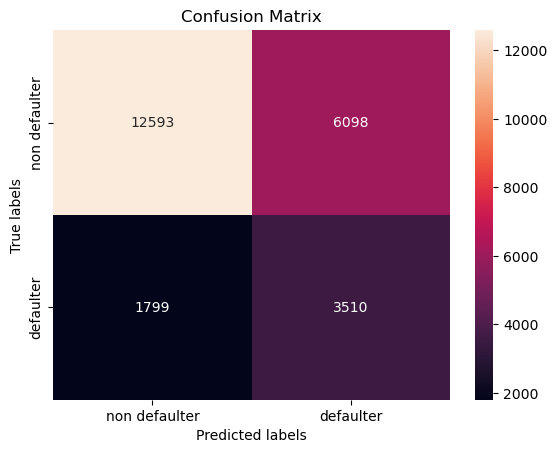

In [139]:
# Get the confusion matrix for both train and test

labels = ['non defaulter', 'defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='.0f') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[3109 1564]
 [ 476  851]]


[Text(0, 0.5, 'non defaulter'), Text(0, 1.5, 'defaulter')]

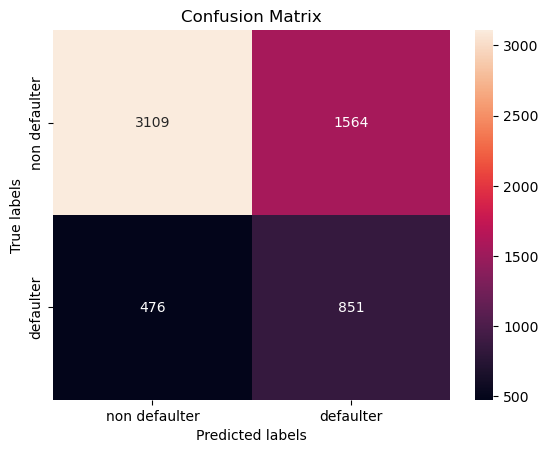

In [140]:
labels = ['non defaulter', 'defaulter']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='.0f') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

defaulter= positive class
non defaulter =Negative class

Recall good performed with 63 % on train and 62% test

In [141]:
# storing metric values in train df for later comparisons

dict1={'Model':'logistic regression - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,train_class_preds),2),
       'Precision':[list(np.around(precision_score(y_train,train_class_preds,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,train_class_preds,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,train_class_preds,average=None),decimals=2))],
       'Comments':'recall well performed'}
training_df=pd.DataFrame(dict1,index=[0])

In [142]:
# storing metric values in test df for later comparisons

dict2={'Model':'logistic regression - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,test_class_preds),2),
       'Precision':[list(np.around(precision_score(y_test,test_class_preds,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,test_class_preds,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,test_class_preds,average=None),decimals=2))],
       'Comments':'recall well performed'}
test_df=pd.DataFrame(dict2,index=[0])

# hypertuning logistic regression

In [143]:
# Parameters
LR=LogisticRegression(random_state=42)
param_dist = {
    'penalty': ['l1', 'l2', 'none'],
    'class_weight':['balanced'],
    'C': np.logspace(-4, 4, 10),  
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500, 800, 1000],
    'l1_ratio': np.linspace(0, 1, 10)}

In [144]:
logistic_random = RandomizedSearchCV(LR, param_distributions=param_dist, cv=5, scoring='recall', random_state=42, n_jobs=-1,n_iter=100)

In [145]:
# traning of dataset
logistic_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                        'class_weight': ['balanced'],
                                        'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     800, 1000],
                                        'penalty': ['l1', 'l2', 'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'saga']},
                   random_state=42, scoring='recall')

In [146]:
# best parameters
logistic_random.best_estimator_

LogisticRegression(C=0.0001, class_weight='balanced',
                   l1_ratio=0.3333333333333333, max_iter=800, random_state=42,
                   solver='liblinear')

In [147]:
#store into variable
lr_random_best=logistic_random.best_estimator_

In [148]:
# predictions
y_pred_train_lr=lr_random_best.predict(X_train)
y_pred_test_lr=lr_random_best.predict(X_test)

In [149]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set -random search Logistic regression:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train_lr))
print('The precision of training set = ',precision_score(y_train,y_pred_train_lr,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train_lr,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train_lr,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train_lr))

The evaluation metric values for training set -random search Logistic regression:
The accuracy of training set =  0.6275416666666667
The precision of training set =  [0.87444325 0.33466934]
The recall of training set =  [0.60922369 0.6920324 ]
The f1 score of training set =  [0.71812821 0.45115736]
The confusion matrix of training set = 
 [[11387  7304]
 [ 1635  3674]]


In [150]:
# finding each of the metrics for test set

print('The evaluation metric values for test set -random search logistic regression:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test_lr))
print('The precision of test set = ',precision_score(y_test,y_pred_test_lr,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test_lr,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test_lr,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test_lr))

The evaluation metric values for test set -random search logistic regression:
The accuracy of test set =  0.624
The precision of test set =  [0.8763625  0.33345285]
The recall of test set =  [0.60218275 0.70082894]
The f1 score of test set =  [0.71385084 0.45189504]
The confusion matrix of test set = 
 [[2814 1859]
 [ 397  930]]


Recall well performed on traning 70% and test 69%

In [151]:
# Storing metric values in train_df for later comparisons

dict1 = {
    'Model': 'Logistic regression - After hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_train,y_pred_train_lr), 2),
    'Precision': np.around(precision_score(y_train,y_pred_train_lr, average=None), decimals=2),
    'Recall': np.around(recall_score(y_train,y_pred_train_lr, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_train,y_pred_train_lr, average=None), decimals=2),
    'Comments': 'recall good performed'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)


In [152]:
# Storing metric values in test_df for later comparisons

dict2 = {
    'Model': 'Logistic regression - After hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_test,y_pred_test_lr), 2),
    'Precision': np.around(precision_score(y_test,y_pred_test_lr, average=None), decimals=2),
    'Recall': np.around(recall_score(y_test,y_pred_test_lr, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_test,y_pred_test_lr, average=None), decimals=2),
    'Comments': 'recall good performed'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)


**Random Forest classifier**

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
#creating instance of random forest and fitting data

rf_model=RandomForestClassifier(random_state=0,class_weight='balanced')
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [155]:
# predicting for both train and test

y_pred_train_rand=rf_model.predict(X_train)
y_pred_test_rand=rf_model.predict(X_test)

In [156]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train_rand))
print('The precision of training set = ',precision_score(y_train,y_pred_train_rand,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train_rand,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train_rand,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train_rand))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  0.9993333333333333
The precision of training set =  [1.         0.99699531]
The recall of training set =  [0.99914397 1.        ]
The f1 score of training set =  [0.9995718  0.99849539]
The confusion matrix of training set = 
 [[18675    16]
 [    0  5309]]


In [157]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test_rand))
print('The precision of test set = ',precision_score(y_test,y_pred_test_rand,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test_rand,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test_rand,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test_rand))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.7986666666666666
The precision of test set =  [0.82437746 0.59028832]
The recall of test set =  [0.94222127 0.29314243]
The f1 score of test set =  [0.87936888 0.3917422 ]
The confusion matrix of test set = 
 [[4403  270]
 [ 938  389]]


Here all matrix got overfitting

In [158]:
# Storing metric values in train_df for later comparisons

dict1 = {
    'Model': 'Random Forest - Before hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_train,y_pred_train_rand), 2),
    'Precision': np.around(precision_score(y_train,y_pred_train_rand, average=None), decimals=2),
    'Recall': np.around(recall_score(y_train,y_pred_train_rand, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_train,y_pred_train_rand, average=None), decimals=2),
    'Comments': 'overfitting model'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)


In [159]:
# Storing metric values in test_df for later comparisons

dict2 = {
    'Model': 'Random Forest - Before hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_test,y_pred_test_rand), 2),
    'Precision': np.around(precision_score(y_test,y_pred_test_rand, average=None), decimals=2),
    'Recall': np.around(recall_score(y_test,y_pred_test_rand, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_test,y_pred_test_rand, average=None), decimals=2),
    'Comments': 'overfitting model'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)


# Hypertuning of random forest

In [160]:

# HYperparameter Grid
param_dict1 = {
    'n_estimators': list(np.arange(80, 200, 20, dtype='int64')),
    'max_depth': list(np.arange(12, 30, 2, dtype='int64')),
    'min_samples_split': list(np.arange(50, 200, 10, dtype='int64')),
    'min_samples_leaf': list(np.arange(40, 80, 10, dtype='int64')),
    'class_weight': ['balanced', None],
    'max_features': ['auto', 'log2']}

In [161]:
classifier=RandomizedSearchCV(estimator=rf_model,param_distributions = param_dict1,cv =10,scoring='recall',n_jobs=-1,random_state=42)

In [162]:
classifier.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=0),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [12, 14, 16, 18, 20, 22,
                                                      24, 26, 28],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [40, 50, 60, 70],
                                        'min_samples_split': [50, 60, 70, 80,
                                                              90, 100, 110, 120,
                                                              130, 140, 150,
                                                              160, 170, 180,
                                                              190],
                                        'n_estimators': [80, 100, 120, 140, 160,
                                                         180]},
                   random_state=42, scoring='recall')

In [163]:
classifier.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=26,
                       max_features='auto', min_samples_leaf=70,
                       min_samples_split=180, n_estimators=120, random_state=0)

In [164]:
# store best parameters into variable
classifier_best=classifier.best_estimator_

In [165]:
#traning of dataset
y_pred_train2=classifier_best.predict(X_train)
y_pred_test2=classifier_best.predict(X_test)

In [166]:
print('The evaluation metric values for training set -hypertuning Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train2))
print('The precision of training set = ',precision_score(y_train,y_pred_train2,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train2,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train2,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train2))

The evaluation metric values for training set -hypertuning Random forest:
The accuracy of training set =  0.7465
The precision of training set =  [0.89149742 0.45094316]
The recall of training set =  [0.76796319 0.67093615]
The f1 score of training set =  [0.82513221 0.53937008]
The confusion matrix of training set = 
 [[14354  4337]
 [ 1747  3562]]


In [167]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - hypertuning Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test2))
print('The precision of test set = ',precision_score(y_test,y_pred_test2,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test2,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test2,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test2))

The evaluation metric values for test set - hypertuning Random forest:
The accuracy of test set =  0.7385
The precision of test set =  [0.88245441 0.4376931 ]
The recall of test set =  [0.76631714 0.64054258]
The f1 score of test set =  [0.8202955  0.52003671]
The confusion matrix of test set = 
 [[3581 1092]
 [ 477  850]]


[[14354  4337]
 [ 1747  3562]]


[Text(0, 0.5, 'non defaulter'), Text(0, 1.5, 'defaulter')]

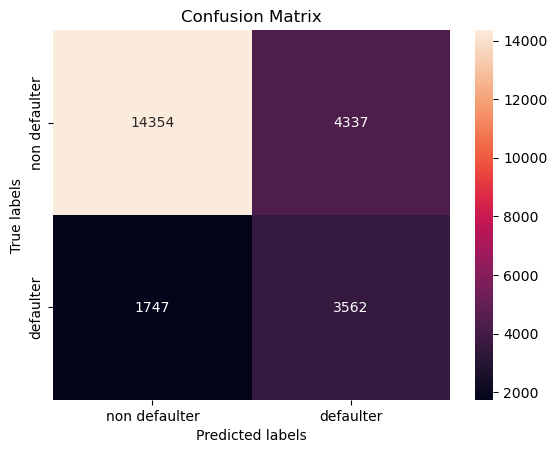

In [168]:
# Get the confusion matrix for both train and test
#Traning

labels = ['non defaulter', 'defaulter']
cm = confusion_matrix(y_train,y_pred_train2)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='.0f') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[3581 1092]
 [ 477  850]]


[Text(0, 0.5, 'non defaulter'), Text(0, 1.5, 'defaulter')]

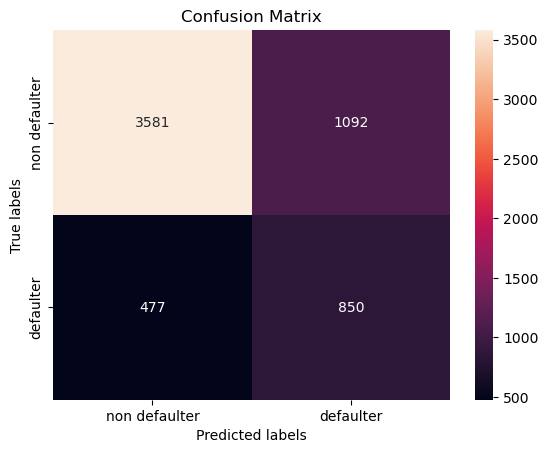

In [169]:
# Get the confusion matrix for both train and test
#Testing

labels = ['non defaulter', 'defaulter']
cm = confusion_matrix(y_test,y_pred_test2)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='.0f') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Recall on train 67% and test 64% well performed

In [170]:
# Storing metric values in train_df for later comparisons

dict1 = {
    'Model': 'Random Forest - After hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_train,y_pred_train2), 2),
    'Precision': np.around(precision_score(y_train,y_pred_train2, average=None), decimals=2),
    'Recall': np.around(recall_score(y_train,y_pred_train2, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_train,y_pred_train2, average=None), decimals=2),
    'Comments': 'Reduced overfitting and recall performed good'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)

In [171]:
# Storing metric values in test_df for later comparisons

dict2 = {
    'Model': 'Random Forest -After hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_test,y_pred_test2), 2),
    'Precision': np.around(precision_score(y_test,y_pred_test2, average=None), decimals=2),
    'Recall': np.around(recall_score(y_test,y_pred_test2, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_test,y_pred_test2, average=None), decimals=2),
    'Comments': 'Reduced overfitting and recall good performed'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)

**decisiontree classifier**

In [172]:
#import libary
from sklearn.tree import DecisionTreeClassifier

In [173]:
credit_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 15,class_weight='balanced', random_state=42)
credit_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_leaf_nodes=15, random_state=42)

In [174]:
y_train_pred_tree= credit_classifier.predict(X_train)

In [175]:
y_test_pred_tree= credit_classifier.predict(X_test)

In [176]:
print('The evaluation metric values for training set - Decision tree:')
print('The accuracy of training set = ',accuracy_score(y_train,y_train_pred_tree))
print('The precision of training set = ',precision_score(y_train,y_train_pred_tree,average=None))
print('The recall of training set = ',recall_score(y_train,y_train_pred_tree,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_train_pred_tree,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_train_pred_tree))

The evaluation metric values for training set - Decision tree:
The accuracy of training set =  0.7412916666666667
The precision of training set =  [0.88491427 0.44220396]
The recall of training set =  [0.76764218 0.64852138]
The f1 score of training set =  [0.82211718 0.52584956]
The confusion matrix of training set = 
 [[14348  4343]
 [ 1866  3443]]


In [177]:
print('The evaluation metric values for test set - Decision tree:')
print('The accuracy of test set = ',accuracy_score(y_test,y_test_pred_tree))
print('The precision of test set = ',precision_score(y_test,y_test_pred_tree,average=None))
print('The recall of test set = ',recall_score(y_test,y_test_pred_tree,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_test_pred_tree,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_test_pred_tree))

The evaluation metric values for test set - Decision tree:
The accuracy of test set =  0.7401666666666666
The precision of test set =  [0.88031265 0.43913956]
The recall of test set =  [0.77123903 0.63074604]
The f1 score of test set =  [0.82217406 0.51778534]
The confusion matrix of test set = 
 [[3604 1069]
 [ 490  837]]


recall got 64% train and 61% test

In [178]:
# Storing metric values in train_df for later comparisons

dict1 = {
    'Model': 'Decision Tree - Before hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_train,y_train_pred_tree), 2),
    'Precision': np.around(precision_score(y_train,y_train_pred_tree, average=None), decimals=2),
    'Recall': np.around(recall_score(y_train,y_train_pred_tree, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_train,y_train_pred_tree, average=None), decimals=2),
    'Comments': 'recall well performed'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)

In [179]:
# Storing metric values in test_df for later comparisons

dict2 = {
    'Model': 'Decision Tree -Before hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_test,y_test_pred_tree), 2),
    'Precision': np.around(precision_score(y_test,y_test_pred_tree, average=None), decimals=2),
    'Recall': np.around(recall_score(y_test,y_test_pred_tree, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_test,y_test_pred_tree, average=None), decimals=2),
    'Comments': 'recall well performed'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)

# hypertuning of decision tree

In [180]:
tree_class = DecisionTreeClassifier()

grid_values = {
    'criterion': ['entropy'], 
    'max_depth': [None, 5, 8, 10, 12, 15, 18, 20], 
    'max_leaf_nodes': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 5, 7, 10],
    'class_weight': ['balanced'],
    'random_state': [0, 2, 4, 6, 8, 10] }

class_tree=RandomizedSearchCV(
    estimator=tree_class,
    param_distributions=grid_values,
    scoring='recall',
    cv=10,
    n_jobs=-1,
    random_state=0)

# Fit the object to train dataset
class_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['entropy'],
                                        'max_depth': [None, 5, 8, 10, 12, 15,
                                                      18, 20],
                                        'max_leaf_nodes': [5, 10, 15, 20, 25,
                                                           30],
                                        'min_samples_leaf': [1, 2, 3, 5, 7, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'random_state': [0, 2, 4, 6, 8, 10]},
                   random_state=0, scoring='recall')

In [181]:
# best parameters
class_tree.best_params_

{'random_state': 0,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 5,
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [182]:
class_tree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_leaf_nodes=5, min_samples_split=10,
                       random_state=0)

In [183]:
#store into variable
classtree_best=class_tree.best_estimator_

In [184]:
y_pred_train_classtree=classtree_best.predict(X_train)
y_pred_test_classtree=classtree_best.predict(X_test)

In [185]:
print('The evaluation metric values for training set - decision tree_grandsearch:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train_classtree))
print('The precision of training set = ',precision_score(y_train,y_pred_train_classtree,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train_classtree,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train_classtree,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train_classtree))

The evaluation metric values for training set - decision tree_grandsearch:
The accuracy of training set =  0.6704583333333334
The precision of training set =  [0.89564069 0.37468672]
The recall of training set =  [0.65293457 0.73215295]
The f1 score of training set =  [0.75526813 0.49569598]
The confusion matrix of training set = 
 [[12204  6487]
 [ 1422  3887]]


In [186]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - decisiontree grid:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test_classtree))
print('The precision of test set = ',precision_score(y_test,y_pred_test_classtree,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test_classtree,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test_classtree,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test_classtree))

The evaluation metric values for test set - decisiontree grid:
The accuracy of test set =  0.667
The precision of test set =  [0.88846936 0.36879155]
The recall of test set =  [0.6546116  0.71062547]
The f1 score of test set =  [0.75381962 0.48558187]
The confusion matrix of test set = 
 [[3059 1614]
 [ 384  943]]


[[12204  6487]
 [ 1422  3887]]


[Text(0, 0.5, 'non defaulter'), Text(0, 1.5, 'defaulter')]

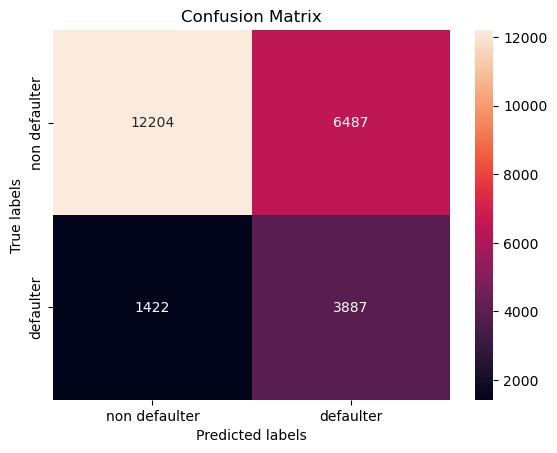

In [187]:
# Get the confusion matrix for both train and test
#Traning

labels = ['non defaulter', 'defaulter']
cm = confusion_matrix(y_train,y_pred_train_classtree)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='.0f') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[3059 1614]
 [ 384  943]]


[Text(0, 0.5, 'non defaulter'), Text(0, 1.5, 'defaulter')]

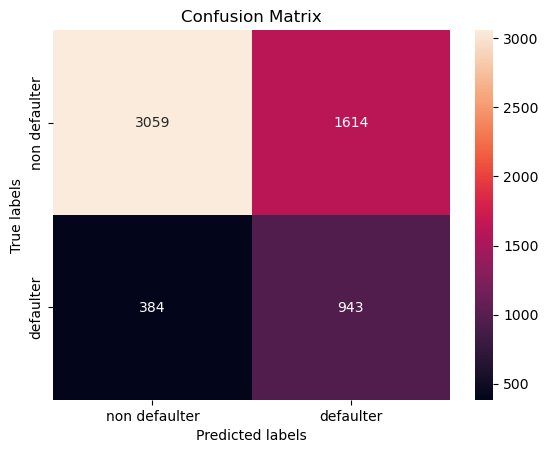

In [188]:
# Get the confusion matrix for both train and test
#Testing

labels = ['non defaulter', 'defaulter']
cm = confusion_matrix(y_test,y_pred_test_classtree)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='.0f') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Recall best performed as 75 on train and 73 on test

In [189]:
# Storing metric values in train_df for later comparisons

dict1 = {
    'Model': 'Decision Tree - After hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_train,y_pred_train_classtree), 2),
    'Precision': np.around(precision_score(y_train,y_pred_train_classtree, average=None), decimals=2),
    'Recall': np.around(recall_score(y_train,y_pred_train_classtree, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_train,y_pred_train_classtree, average=None), decimals=2),
    'Comments': 'recall best performed'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)

In [190]:
# Storing metric values in test_df for later comparisons

dict2 = {
    'Model': 'Decision Tree -After hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_test,y_pred_test_classtree), 2),
    'Precision': np.around(precision_score(y_test,y_pred_test_classtree, average=None), decimals=2),
    'Recall': np.around(recall_score(y_test,y_pred_test_classtree, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_test,y_pred_test_classtree, average=None), decimals=2),
    'Comments': 'recall best performed'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)

**XGBOOST**

In [191]:
# implementing XGBoost classifier
#default hyperparametes
xgb_model = XGBClassifier(
    random_state=0,
    n_jobs=-1,
    n_estimators=200,          
    scale_pos_weight=1.5,      
    subsample=0.8,            
    colsample_bytree=0.8,      
    min_child_weight=3,        
    gamma=0.1 )

xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=0, ...)

In [192]:
# predicting for both training and test set

y_pred_train_xg=xgb_model.predict(X_train)
y_pred_testxg=xgb_model.predict(X_test)

In [193]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train_xg))
print('The precision of training set = ',precision_score(y_train,y_pred_train_xg,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train_xg,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train_xg,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train_xg))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.8879166666666667
The precision of training set =  [0.90854312 0.79646819]
The recall of training set =  [0.95190198 0.66264833]
The f1 score of training set =  [0.9297173  0.72342176]
The confusion matrix of training set = 
 [[17792   899]
 [ 1791  3518]]


In [194]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_testxg))
print('The precision of test set = ',precision_score(y_test,y_pred_testxg,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_testxg,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_testxg,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_testxg))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.7776666666666666
The precision of test set =  [0.83761375 0.49668246]
The recall of test set =  [0.8863685  0.39487566]
The f1 score of test set =  [0.86130173 0.43996641]
The confusion matrix of test set = 
 [[4142  531]
 [ 803  524]]


overfitting model

In [195]:
# Storing metric values in train_df for later comparisons

dict1 = {
    'Model': 'XgBoost - Before hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_train,y_pred_train_xg), 2),
    'Precision': np.around(precision_score(y_train,y_pred_train_xg, average=None), decimals=2),
    'Recall': np.around(recall_score(y_train,y_pred_train_xg, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_train,y_pred_train_xg, average=None), decimals=2),
    'Comments': 'overfitting  model'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)

In [196]:
# Storing metric values in test_df for later comparisons

dict2 = {
    'Model': 'XgBoost-Before hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_test,y_pred_testxg), 2),
    'Precision': np.around(precision_score(y_test,y_pred_testxg, average=None), decimals=2),
    'Recall': np.around(recall_score(y_test,y_pred_testxg, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_test,y_pred_testxg, average=None), decimals=2),
    'Comments': 'overfitting model'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)

**xg boostwith random search cv**

In [197]:
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 5, 10, 15, 20],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'learning_rate': [0.01, 0.03, 0.05, 0.07],
    'scale_pos_weight': [1, 2, 5, 10]}

In [198]:
xgb_models = XGBClassifier(random_state=42)
xgb_random = RandomizedSearchCV(estimator=xgb_models,param_distributions = param_dict1,cv = 5,scoring='recall',n_jobs=-1,random_state=42)
xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [12, 14, 16, 18, 20, 22,
                                                      24, 26, 28],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [40, 50, 60, 70],
                                        'min_samples_split': [50, 60, 70, 80,
                                                              90, 100, 110, 120,
                                                              130, 140, 150,
                                                              160, 170, 180,
                                                              190],
                                        'n_estimators': [80, 100, 120, 140, 160,
                                                         180]},
                   random_state=42, scoring='recall')

In [199]:
# checking the best parameters

xgb_random.best_params_

{'n_estimators': 160,
 'min_samples_split': 150,
 'min_samples_leaf': 70,
 'max_features': 'log2',
 'max_depth': 26,
 'class_weight': 'balanced'}

In [200]:
# storing the best estimator in a variable
xgb_random_best=xgb_random.best_estimator_

In [201]:
# predicting on both train and test
y_pred_train_xgrandom=xgb_random_best.predict(X_train)
y_pred_test_xgrandom=xgb_random_best.predict(X_test)

In [202]:
# finding each of the metrics for training set

print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',round(accuracy_score(y_train,y_pred_train_xgrandom),2))
print('The precision of training set = ',precision_score(y_train,y_pred_train_xgrandom,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train_xgrandom,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train_xgrandom,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train_xgrandom))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  1.0
The precision of training set =  [0.99935825 0.99924543]
The recall of training set =  [0.99978599 0.99773969]
The f1 score of training set =  [0.99957208 0.99849199]
The confusion matrix of training set = 
 [[18687     4]
 [   12  5297]]


In [203]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',round(accuracy_score(y_test,y_pred_test_xgrandom),2))
print('The precision of test set = ',precision_score(y_test,y_pred_test_xgrandom,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test_xgrandom,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test_xgrandom,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test_xgrandom))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.78
The precision of test set =  [0.82921569 0.50666667]
The recall of test set =  [0.90498609 0.34363225]
The f1 score of test set =  [0.86544562 0.40951953]
The confusion matrix of test set = 
 [[4229  444]
 [ 871  456]]


[[18687     4]
 [   12  5297]]


[Text(0, 0.5, 'non defaulter'), Text(0, 1.5, 'defaulter')]

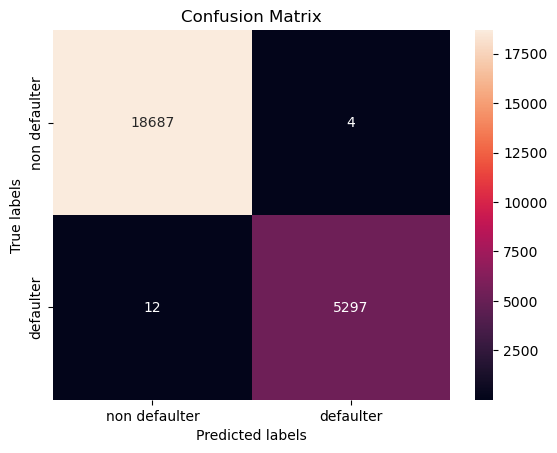

In [204]:
# Get the confusion matrix for both train and test
#traning

labels = ['non defaulter', 'defaulter']
cm = confusion_matrix(y_train,y_pred_train_xgrandom)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='.0f') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[4229  444]
 [ 871  456]]


[Text(0, 0.5, 'non defaulter'), Text(0, 1.5, 'defaulter')]

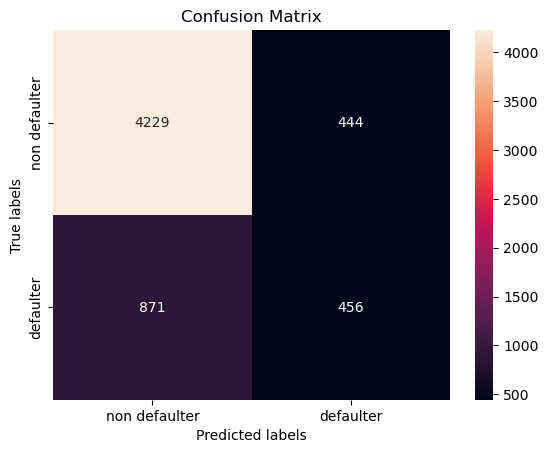

In [205]:
# Get the confusion matrix for both train and test
#test

labels = ['non defaulter', 'defaulter']
cm = confusion_matrix(y_test,y_pred_test_xgrandom)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='.0f') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

recall got overfitting after paramaetr tuning

In [206]:
# Storing metric values in train_df for later comparisons

dict1 = {
    'Model': 'XgBoost - After hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_train,y_pred_train_xgrandom), 2),
    'Precision': np.around(precision_score(y_train,y_pred_train_xgrandom, average=None), decimals=2),
    'Recall': np.around(recall_score(y_train,y_pred_train_xgrandom, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_train,y_pred_train_xgrandom, average=None), decimals=2),
    'Comments': 'overfitting performed'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)

In [207]:
# Storing metric values in test_df for later comparisons

dict2 = {
    'Model': 'XgBoost-After hyperparameter tuning',
    'Accuracy': round(accuracy_score(y_test,y_pred_test_xgrandom), 2),
    'Precision': np.around(precision_score(y_test,y_pred_test_xgrandom, average=None), decimals=2),
    'Recall': np.around(recall_score(y_test,y_pred_test_xgrandom, average=None), decimals=2),
    'F1_score': np.around(f1_score(y_test,y_pred_test_xgrandom, average=None), decimals=2),
    'Comments': 'overfitting performed'
}

# Convert dict1 to a DataFrame with a single row and append it to training_df
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)

**Check all performance of all model together**

In [208]:
#check of training values
training_df

,Model,Accuracy,Precision,Recall,F1_score,Comments
0,logistic regression - Before hyperparameter tu...,0.67,"[0.88, 0.37]","[0.67, 0.66]","[0.76, 0.47]",recall well performed
1,Logistic regression - After hyperparameter tuning,0.63,"[0.87, 0.33]","[0.61, 0.69]","[0.72, 0.45]",recall good performed
2,Random Forest - Before hyperparameter tuning,1.00,"[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]",overfitting model
3,Random Forest - After hyperparameter tuning,0.75,"[0.89, 0.45]","[0.77, 0.67]","[0.83, 0.54]",Reduced overfitting and recall performed good
4,Decision Tree - Before hyperparameter tuning,0.74,"[0.88, 0.44]","[0.77, 0.65]","[0.82, 0.53]",recall well performed
5,Decision Tree - After hyperparameter tuning,0.67,"[0.9, 0.37]","[0.65, 0.73]","[0.76, 0.5]",recall best performed
6,XgBoost - Before hyperparameter tuning,0.89,"[0.91, 0.8]","[0.95, 0.66]","[0.93, 0.72]",overfitting model
7,XgBoost - After hyperparameter tuning,1.00,"[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]",overfitting performed


In [209]:
# checl of test values
test_df

,Model,Accuracy,Precision,Recall,F1_score,Comments
0,logistic regression - Before hyperparameter tu...,0.66,"[0.87, 0.35]","[0.67, 0.64]","[0.75, 0.45]",recall well performed
1,Logistic regression - After hyperparameter tuning,0.62,"[0.88, 0.33]","[0.6, 0.7]","[0.71, 0.45]",recall good performed
2,Random Forest - Before hyperparameter tuning,0.80,"[0.82, 0.59]","[0.94, 0.29]","[0.88, 0.39]",overfitting model
3,Random Forest -After hyperparameter tuning,0.74,"[0.88, 0.44]","[0.77, 0.64]","[0.82, 0.52]",Reduced overfitting and recall good performed
4,Decision Tree -Before hyperparameter tuning,0.74,"[0.88, 0.44]","[0.77, 0.63]","[0.82, 0.52]",recall well performed
5,Decision Tree -After hyperparameter tuning,0.67,"[0.89, 0.37]","[0.65, 0.71]","[0.75, 0.49]",recall best performed
6,XgBoost-Before hyperparameter tuning,0.78,"[0.84, 0.5]","[0.89, 0.39]","[0.86, 0.44]",overfitting model
7,XgBoost-After hyperparameter tuning,0.78,"[0.83, 0.51]","[0.9, 0.34]","[0.87, 0.41]",overfitting performed


**Best among all model is precision metrix**

# Conclusion

### Throughout the analysis we went through various steps to determine our predictions for the defaulter of credit card. We started with simple EDA where we analysed our dependent variable as well as other independent variables. We found out the correlation, count, relationships with the dependent variable. We looked for missing values and outliers and did some feature modifications,remove decent amount of skewness.
--------------------------------------------------------------------------------
### Finally we implemented 4 machine learning algorithms namely;Logistic regression,decision tree classifier, RandomForest and XGBoost and also with randomized search cv for hyperparameter tuning to reduce overfitting and increase model performance. The best performance was given by our decision tree model.But Almost all method hypertuning shows reult for recall matrix around 64-73% on traning and for testing 71%. which means recall matrix among all matrix was best as we have to reduce falls negative .
-------------------------------------------------------------------------------
### The recall of our best model was 73% and 71% for training and test set respectively in decision tree  after hypertunning model . Although, the difference is still 2.performnace can be still better with approach of handelling skewness more effectively and applying pca to required columns and applying still better hyperarameters for best results.